The p

other utility (who?) collects unit price info on their tools
CED locations
Columbia electric supply
northcoast electric
stoneway
stusser
(have storefront in yaccama or walla walla)

Notes

* Jake mentioned there are many accounts for railroad crossings and other super low usage items, so I may need to filter by that columns (it is in the usage datae)

# Data Cleaning

In [1]:
%matplotlib inline
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
#import statsmodels as sm
import glob
import numpy as np
import scipy
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# function that filters given dataframe based on two categories and specified criteria. 19 code is just a default value that shouldn't affect filtering unless defined otherwise.
# filter by: category w/ criteria & second category with criteria & another criteria or second category 
# w/ criteria & another criteria or second category w/ criteria and another criteria or second category with criteria
def df_dfilter(df_name,cat,crit,cat1,crit1,bool0=True,bool1=True,andcrit='',andbool=True,andcrit2='',andbool2=True,crit2='19191919',bool2=True,crit3='19191919',bool3=True,andcrit3='',andbool3=True,crit4='19191919',bool4=True,andcrit4='',andbool4=True,only1_crit='19191919',only1_bool=True):
    new_df=df_name[((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit1) == bool1)&(df_name[cat1].str.contains(andcrit) == andbool))|((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit2) == bool2)&(df_name[cat1].str.contains(andcrit2) == andbool2))|((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit3) == bool3)&(df_name[cat1].str.contains(andcrit3) == andbool3))|((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit4) == bool4)&(df_name[cat1].str.contains(andcrit4) == andbool4))|(df_name[cat1].str.contains(only1_crit) == only1_bool)]
    return new_df

In [3]:
# This filter is meant to be used after any string filtering is already done to the dataframe
# Again 19 code makes function not exclude anything for default parameter
def df_vfilter(df_name,cat,gvalue='-1919191919',lvalue='19191919'):
    new_df=df_name[((df_name[cat]>gvalue)&(df_name[cat]<lvalue))]
    return new_df

In [91]:
# Improved category search function, searches through two category filters
def dcat_names(df_name,cat,crit,cat1,crit1,bool0=True,bool1=True,andcrit='',andbool=True,andcrit2='',andbool2=True,crit2='19191919',bool2=True,crit3='19191919',bool3=True,andcrit3='',andbool3=True,crit4='19191919',bool4=True,andcrit4='',andbool4=True,only1_crit='19191919',only1_bool=True):
    print(df_name[(df_name[cat].str.contains(crit) == bool0)&((df_name[cat1].str.contains(crit1) == bool1)&(df_name[cat1].str.contains(andcrit) == andbool))|((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit2) == bool2)&(df_name[cat1].str.contains(andcrit2) == andbool2))|((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit3) == bool3)&(df_name[cat1].str.contains(andcrit3) == andbool3))|((df_name[cat].str.contains(crit) == bool0)&(df_name[cat1].str.contains(crit4) == bool4)&(df_name[cat1].str.contains(andcrit4) == andbool4))|(df_name[cat1].str.contains(only1_crit) == only1_bool)][cat1].unique())

In [4]:
def list_files(dir):
    cnt=0
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            if "qtrly_extract" in name:
                if "VL" not in name:
                    arr.append(os.path.join(root, name))
                    cnt+=1
    print(cnt, "files found!")
    return arr

In [5]:
files=list_files(r'S:\CLIENTS\A02648_Wattsmart Business RMP\WSB RMP\03 - Design\Customer Data\Customer Data Extracts\2018\All Qtrly')

4 files found!


In [6]:
path = r'S:\CLIENTS\A02648_Wattsmart Business RMP\WSB RMP\03 - Design\Customer Data\Customer Data Extracts\2018\All Qtrly'     
# use your path

all_files = glob.glob(os.path.join(path, "*qtrly*"))     # advisable to use os.path.join as this makes concatenation OS independent
print(all_files)
df_from_each_file = (pd.read_csv(f,low_memory=False,usecols=['AM','#CUSTOMER_ID','NAME','REVENUE_CLASS_CD','PRICING_STRUCTURE_CD','CITY_NAME','STATE_CD','ZIP_CD','SITE_ID','METER_EQUIPMENT_SERIAL_CD','MAIL_CITY_NAME','MAIL_STATE_CD','MAIL_ZIP_CD','STD_INDUSTRIAL_CLASS_CD','SERVICE_LOCATION_DESC','READING_SCHD_YEAR','READING_SCHD_MONTH','KW','KWH','USAGE_ELAPSED_DAYS']) for f in all_files)
df   = pd.concat(df_from_each_file,ignore_index=True)

['S:\\CLIENTS\\A02648_Wattsmart Business RMP\\WSB RMP\\03 - Design\\Customer Data\\Customer Data Extracts\\2018\\All Qtrly\\01 Jan finanswer_qtrly_extract.csv', 'S:\\CLIENTS\\A02648_Wattsmart Business RMP\\WSB RMP\\03 - Design\\Customer Data\\Customer Data Extracts\\2018\\All Qtrly\\04 Apr finanswer_qtrly_extract.csv', 'S:\\CLIENTS\\A02648_Wattsmart Business RMP\\WSB RMP\\03 - Design\\Customer Data\\Customer Data Extracts\\2018\\All Qtrly\\07 Jul finanswer_qtrly_extract.csv', 'S:\\CLIENTS\\A02648_Wattsmart Business RMP\\WSB RMP\\03 - Design\\Customer Data\\Customer Data Extracts\\2018\\All Qtrly\\10 Oct finanswer_qtrly_extract.csv']


In [7]:
df.size

45287240

In [8]:
df.NAME.count()

2264362

In [9]:
df.dtypes

#CUSTOMER_ID                   int64
NAME                          object
REVENUE_CLASS_CD              object
PRICING_STRUCTURE_CD          object
CITY_NAME                     object
STATE_CD                      object
ZIP_CD                        object
SITE_ID                        int64
METER_EQUIPMENT_SERIAL_CD     object
AM                            object
MAIL_CITY_NAME                object
MAIL_STATE_CD                 object
MAIL_ZIP_CD                  float64
SERVICE_LOCATION_DESC         object
STD_INDUSTRIAL_CLASS_CD        int64
READING_SCHD_YEAR              int64
READING_SCHD_MONTH             int64
USAGE_ELAPSED_DAYS             int64
KWH                            int64
KW                             int64
dtype: object

In [10]:
import sys
initialsize=sys.getsizeof(df)
initialsize

1810068204

In [11]:
df['ZIP_CD'].isnull().sum()

7397

In [12]:
df=df.dropna(subset=['ZIP_CD']);

In [13]:
df['ZIP_CD'].isnull().sum()

0

In [14]:
df['ZIP_CD']=df['ZIP_CD'].str.replace(' ','')

In [15]:
df['ZIP_CD']=df['ZIP_CD'].apply(pd.to_numeric,errors='coerce').dropna().astype('int');

In [16]:
df['ZIP_CD'].dtype

dtype('float64')

In [17]:
df=df.dropna(subset=['ZIP_CD'])
df['ZIP_CD'].isnull().sum()

0

In [18]:
df.columns

Index(['#CUSTOMER_ID', 'NAME', 'REVENUE_CLASS_CD', 'PRICING_STRUCTURE_CD',
       'CITY_NAME', 'STATE_CD', 'ZIP_CD', 'SITE_ID',
       'METER_EQUIPMENT_SERIAL_CD', 'AM', 'MAIL_CITY_NAME', 'MAIL_STATE_CD',
       'MAIL_ZIP_CD', 'SERVICE_LOCATION_DESC', 'STD_INDUSTRIAL_CLASS_CD',
       'READING_SCHD_YEAR', 'READING_SCHD_MONTH', 'USAGE_ELAPSED_DAYS', 'KWH',
       'KW'],
      dtype='object')

In [19]:
# use dummies for actively managed accounts, 1 for AM, 0 for not
am_dum=pd.get_dummies(df['AM'])
am_dum['AM'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: AM, dtype: uint8

In [20]:
# replace AM column with dummies
df['AM']=am_dum['AM']
df['AM'].astype('int32')
df['AM'].dtype

dtype('uint8')

In [21]:
# size reduced by about 5%
finalsize=sys.getsizeof(df)
print(finalsize/initialsize)

0.8955388545126889


In [22]:
df.columns

Index(['#CUSTOMER_ID', 'NAME', 'REVENUE_CLASS_CD', 'PRICING_STRUCTURE_CD',
       'CITY_NAME', 'STATE_CD', 'ZIP_CD', 'SITE_ID',
       'METER_EQUIPMENT_SERIAL_CD', 'AM', 'MAIL_CITY_NAME', 'MAIL_STATE_CD',
       'MAIL_ZIP_CD', 'SERVICE_LOCATION_DESC', 'STD_INDUSTRIAL_CLASS_CD',
       'READING_SCHD_YEAR', 'READING_SCHD_MONTH', 'USAGE_ELAPSED_DAYS', 'KWH',
       'KW'],
      dtype='object')

In [23]:
# change pricing structure (rate schedule) to usable two digit code. That code is the last two digits
# newdf['first']=newdf['first'].str[start1:finish1]
df['PRICING_STRUCTURE_CD']=df['PRICING_STRUCTURE_CD'].str[-2:]
befcnt=df['PRICING_STRUCTURE_CD'].count()
# Change datatype to integer. I need to get rid of these first. 8% loss in data
df[(df['PRICING_STRUCTURE_CD'].str.contains(r'[a-zA-Z]')==True)];

df=df[(df['PRICING_STRUCTURE_CD'].str.contains(r'[a-zA-Z]')==False)]
aftcnt=df['PRICING_STRUCTURE_CD'].count()
print(aftcnt/befcnt)

0.9196199477791518


In [24]:
df['PRICING_STRUCTURE_CD']=df['PRICING_STRUCTURE_CD'].astype('int');
print('success!')

success!


In [25]:
# remove duplicates
bef=df['METER_EQUIPMENT_SERIAL_CD'].count()
df.drop_duplicates(inplace=True)
aft=df['METER_EQUIPMENT_SERIAL_CD'].count()
print(np.round(aft/bef)*100,"% of the dataset remains")

100.0 % of the dataset remains


__Revenue Class Code__

In [26]:
df['REVENUE_CLASS_CD'].unique()

array(['COM', 'IRG', 'IND', 'PSH'], dtype=object)

__Normalize Data__

In [27]:
# data to be normalized, rate schedules, kwh, kw

In [28]:
# It seems there are many service descriptions that don't apply to us. I'm thinking we're wanting commercial only.
service_classes=df['SERVICE_LOCATION_DESC'].unique()
len(service_classes)

40910

In [29]:
# so it may be useful to group data by service description
print("Commercial:",df[df['SERVICE_LOCATION_DESC'].str.contains('COMMERCIAL')==True]['SERVICE_LOCATION_DESC'].count(),
     "that's",np.round(100*df[df['SERVICE_LOCATION_DESC'].str.contains('COMMERCIAL')==True]['SERVICE_LOCATION_DESC'].count()/df['SERVICE_LOCATION_DESC'].count()),"% of the total data")

Commercial: 290684 that's 21.0 % of the total data


# Exploratory Analysis

Note: all analysis from here on out besides the state analysis will be Utah specific. That can of course be changed in the future.

Initially I am thinking the useful columns will be:

* Pricing_Structure_Cd, the rate schedules
* AM, if the account is actively managed
* State_Cd, what state the project is in
* Zip_Cd, a more fine tuned versio of the above
* Annual usage, monthly usage can be gathered from quarterly report
* STD_Industrial_Class_Cd, maybe the industrial code

In [30]:
dfut=df_dfilter(df,'NAME','','STATE_CD','UT')
dfut['NAME'].count()

1070495

In [41]:
dfut.columns

Index(['#CUSTOMER_ID', 'NAME', 'REVENUE_CLASS_CD', 'PRICING_STRUCTURE_CD',
       'CITY_NAME', 'STATE_CD', 'ZIP_CD', 'SITE_ID',
       'METER_EQUIPMENT_SERIAL_CD', 'AM', 'MAIL_CITY_NAME', 'MAIL_STATE_CD',
       'MAIL_ZIP_CD', 'SERVICE_LOCATION_DESC', 'STD_INDUSTRIAL_CLASS_CD',
       'READING_SCHD_YEAR', 'READING_SCHD_MONTH', 'USAGE_ELAPSED_DAYS', 'KWH',
       'KW'],
      dtype='object')

In [30]:
df.corr()

,#CUSTOMER_ID,PRICING_STRUCTURE_CD,ZIP_CD,SITE_ID,AM,MAIL_ZIP_CD,STD_INDUSTRIAL_CLASS_CD,READING_SCHD_YEAR,READING_SCHD_MONTH,USAGE_ELAPSED_DAYS,KWH,KW
#CUSTOMER_ID,1.000000,0.041822,0.014589,-0.008606,-0.162735,0.089811,0.020272,0.000287,0.000312,0.007187,0.001090,-0.000165
PRICING_STRUCTURE_CD,0.041822,1.000000,0.280965,-0.007546,-0.072840,0.128424,-0.029591,-0.000093,-0.000612,-0.001346,-0.018115,-0.038671
ZIP_CD,0.014589,0.280965,1.000000,0.002924,-0.072721,0.406365,-0.043203,-0.000354,-0.000346,0.011739,-0.004194,-0.002237
SITE_ID,-0.008606,-0.007546,0.002924,1.000000,-0.003773,0.005182,0.014268,-0.000572,0.000254,-0.001212,0.000719,0.000833
AM,-0.162735,-0.072840,-0.072721,-0.003773,1.000000,-0.268466,-0.042910,0.000220,-0.001043,0.012065,0.027051,0.023958
MAIL_ZIP_CD,0.089811,0.128424,0.406365,0.005182,-0.268466,1.000000,0.038032,-0.002731,-0.000624,-0.000451,-0.004916,-0.001044
STD_INDUSTRIAL_CLASS_CD,0.020272,-0.029591,-0.043203,0.014268,-0.042910,0.038032,1.000000,-0.001488,-0.001161,0.028132,-0.009435,-0.005524
READING_SCHD_YEAR,0.000287,-0.000093,-0.000354,-0.000572,0.000220,-0.002731,-0.001488,1.000000,-0.751686,-0.154081,0.000365,0.000416
READING_SCHD_MONTH,0.000312,-0.000612,-0.000346,0.000254,-0.001043,-0.000624,-0.001161,-0.751686,1.000000,0.180082,0.000534,0.001268
USAGE_ELAPSED_DAYS,0.007187,-0.001346,0.011739,-0.001212,0.012065,-0.000451,0.028132,-0.154081,0.180082,1.000000,0.001611,0.000881


## Meter Level Exploration

### By KWH Usage

c:\users\apetersen\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Relative Frequency')

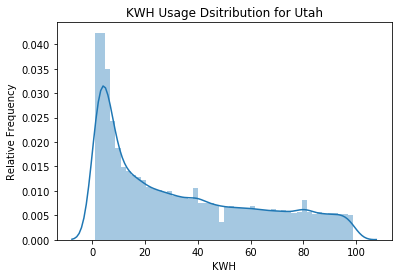

In [31]:
# Look at KWH Usage distribution

df_kwh=df_vfilter(dfut,'KWH',lvalue=100,gvalue=0)
sns.distplot(df_kwh['KWH'])
plt.title("KWH Usage Dsitribution for Utah")
plt.xlabel("KWH")
plt.ylabel("Relative Frequency")
#plt.ylim(0,.002)

Thoughts: very large spread of data over KWH values.

### By Industrial Code

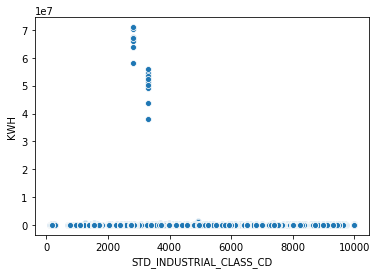

In [35]:
sns.scatterplot(x=dfut['STD_INDUSTRIAL_CLASS_CD'],y=df['KWH'])

Text(0, 0.5, 'Relative Frequency')

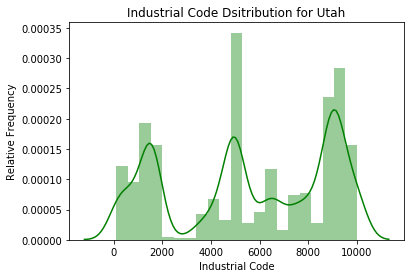

In [35]:
# Look at Industrial Code distribution
df_indcode=df_vfilter(dfut,'KWH',lvalue=10,gvalue=0)
sns.distplot(df_indcode['STD_INDUSTRIAL_CLASS_CD'], color='g')
plt.title("Industrial Code Dsitribution for Utah")
plt.xlabel("Industrial Code")
plt.ylabel("Relative Frequency")
#plt.ylim(0,.002)

Thoughts: Pretty discrete groupings! This could be very useful, but are these separate groups using varying amounts of KWH? 

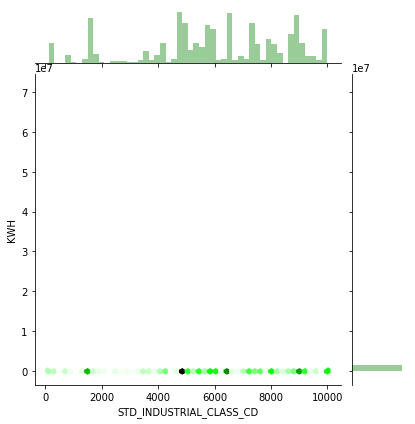

In [36]:
# too much variation in data, let's zoom in
sns.jointplot(x=dfut['STD_INDUSTRIAL_CLASS_CD'],y=dfut['KWH'], kind="hex", color="g")

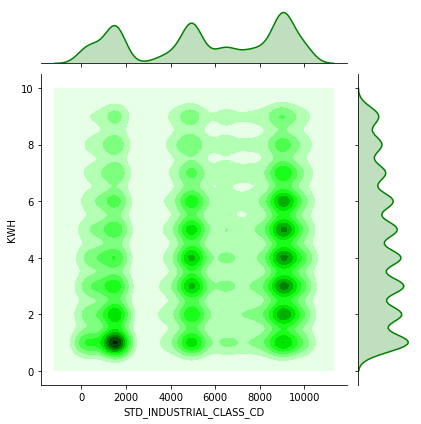

In [37]:
df_indcode=df_vfilter(dfut,'KWH',lvalue=10,gvalue=0)
sns.jointplot(x=df_indcode['STD_INDUSTRIAL_CLASS_CD'],y=df_indcode['KWH'], kind="kde", color="g")

Thoughts: Notice the scale for KWH, The intense relative frequency for some industrial codes (3 of them) may be a good indication that these are small clients.

### KW Demand

### State

In [ ]:
sns.scatterplot(x=df['STATE_CD'],y=df['KWH'])

### Managed

In [ ]:
notManaged=df.loc[df['AM']==0]
notManaged=df_vfilter(notManaged,'KWH',lvalue=3000,gvalue=0)
#notManaged=df_vfilter(notManaged,'KW',lvalue=30,gvalue=0)
managed=df.loc[df['AM']==1]
managed=df_vfilter(managed,'KWH',lvalue=3000,gvalue=0)
#managed=df_vfilter(managed,'KW',lvalue=30,gvalue=0)

In [ ]:
df['KW'].mean()

In [ ]:
#sns.distplot(managed[['KWH']])
#sns.distplot(notManaged[['KWH']])

plt.hist([managed['KWH'],notManaged['KWH']],stacked=True,bins=40,density=True)
plt.legend(['Managed Accounts','Not Managed'])
plt.xlabel('KWH Usage')
plt.ylabel('Relative Frequency')
plt.title("Distribution of Annual Energy Usage")
plt.show()

Thoughts: Managed accounts die off much less rapidly compared to unmanaged accounts - so it seems managed accounts tend to be higher energy, but there are many lower energy as well.

In [ ]:
fig=plt.figure(figsize=(12,12))
    #fig.patch.set_facecolor('white')
   # style.use("seaborn")
plt.subplot(221)
plt.style.use("seaborn")
#plt.title('Distribution of Annual Energy Usage')
ax1=sns.distplot(notManaged['KWH'])
plt.subplot(222)
plt.style.use("seaborn")
#plt.title('Outliers in Annual Usage')
ax2=sns.boxplot(notManaged['KWH'])
    

In [ ]:
sns.jointplot(x=managed['KW'], y=managed['KWH'], kind="hex", color="b")

In [ ]:
sns.jointplot(x=notManaged['KW'], y=notManaged['KWH'], kind="hex", color="b")

In [ ]:
# need to change this to KW per month
sns.scatterplot(x=dfut['KW'],y=dfut['KWH'])

### Rate Schedule

In [ ]:
# look at frequently used rate schedules versus non frequent

plt.hist(dfut['PRICING_STRUCTURE_CD'],bins=40,density=True)
plt.xlabel('Rate Schedule')
plt.ylabel('Relative Frequency')
plt.title("Rate Schedule Populations")

Thoughts: Rate schedule histogram (not technically histogram) is promising, clear market share groups, most of which with rate schedule 23

In [ ]:

sns.scatterplot(x=dfut['PRICING_STRUCTURE_CD'],y=dfut['KWH'],color='b')
plt.style.use("seaborn")
plt.xlabel('Rate Schedule')

Thoughts: Rate schedules 1 and 2 dominate the high energy usage market, however they make up a small percentage of the total market. Conversely rate schedule 23 dominates the market, but has very low energy usage

In [ ]:
sns.barplot(x=dfut['PRICING_STRUCTURE_CD'],y=dfut['KWH'])
plt.title("Power Usage of NONTypical Rate Schedules")

In [ ]:
df_rate=df_vfilter(dfut,'PRICING_STRUCTURE_CD',lvalue=50,gvalue=2)
sns.barplot(x=df_rate['PRICING_STRUCTURE_CD'],y=df_rate['KWH'])
plt.title("Power Usage of Typical Rate Schedules")

Thoughts:

* rate schedules have very distinct groupings both in the frequency (market share) _and_ the power usage (KWH).
* This is meter level, how could I tie this to the customer level? maybe their most frequent rate schedule. 

### Revenue Code

In [ ]:
dfut['REVENUE_CLASS_CD'].count()

In [ ]:
sns.scatterplot(x=dfut['REVENUE_CLASS_CD'],y=dfut['KWH'])
plt.xlabel('Revenue Class')
plt.ylabel('KWH Usage')
plt.title("Revenue Class Energy Usage")

In [ ]:
df_rev=df_vfilter(dfut,'KWH',lvalue=10000000,gvalue=0)
sns.scatterplot(x=df_rev['REVENUE_CLASS_CD'],y=df_rev['KWH'])
plt.title("Revenue Class Energy Usage, Zoomed In")

Thoughts: high energy users are industrial class. However, zoomed in the other revenue codes are not very distinct in terms of power usage.

In [ ]:
# look at distribution of revenue codes

sns.countplot(x=dfut['REVENUE_CLASS_CD'],data=dfut)
#plt.xlabel('Rate Schedule')
#plt.ylabel('Relative Frequency')
plt.title("Distribution of Revenue Classes")

Thoughts: most users are commercial

### Zip Code

In [ ]:
# zoom in on industrial KWH distribution
#df_revclass_ind1=df_vfilter(df_revclass_ind,'KWH',lvalue=1000,gvalue=0)
df_zip=df_vfilter(dfut,'ZIP_CD',lvalue=85000,gvalue=83750)
sns.distplot(df_zip['ZIP_CD'],kde=False,color='m')
plt.title("Zip Code Usage Distribution")
plt.xlabel("Zip Code")
plt.ylabel("Relative Frequency")

In [ ]:
#sns.jointplot(x=df_zip['ZIP_CD'], y=df_zip['KWH'],data=df_zip, kind="kde", color="m")
df_zip=df_vfilter(df_zip,'KW',lvalue=1500,gvalue=0)
sns.barplot(x=df_zip['ZIP_CD'], y=df_zip['KW'],errwidth=0)
plt.xticks(np.arange(85000, 83750, step=200))

## Customer Level Exploration

In [31]:
def flatten_aggregated_dataframe(
    gdf, concat_name=True, concat_separator=' ', name_level=1, inplace=False):
    """
    Flatten aggregated DataFrame.

    Args:
        gdf: DataFrame obtained through aggregation.
        concat_name: Whether to concatenate original column name and
            aggregation function name in the case of MultiIndex columns.
        concat_separator: Which string to place between original column name
            and aggregation function name if concat_name is True.
        name_level: Which element of a column tuple to use in the case of 
            MultiIndex columns and concat_name == False. Should be 0 for 
            original column name and 1 for aggregation function name.
        inplace: Whether to modify the aggregated DataFrame directly 
            (or return a copy).
    """
    if not inplace:
        gdf = gdf.copy()
    if type(gdf.columns) == pd.core.index.MultiIndex:
        if concat_name:
            columns = [concat_separator.join(col) for col in gdf.columns]
        else:
            columns = [col[name_level % 2] for col in gdf.columns]
        gdf.columns = columns
    return gdf.reset_index()

Note: This is the total max KW in a year, I might want to sum all the quarterly max KW (this is what Van does)
Note: KWH is annual, check graphs.
is max most common, or highest?
rate schedule is max, is that just grabbing the highest number per customer, or most common?

There's an issue with the customer data. Notice it is summing KWH, well there aren't exactly 12 measurements for all customers...Justify this by. I think I will justify this by doing KWH/month, dividing by the number of measurements.

In [32]:

#group the meters by the customer who owns them. Essentially a pivot table in Excel.
#KW is max demand since previous read (~month), so I should select max, not sum. Also, total max or average year?
#number of meters is not a sum of all appearances, as data are taken several times. 


custUsageUt=dfut.groupby(['NAME','#CUSTOMER_ID','AM']).agg({'METER_EQUIPMENT_SERIAL_CD':'nunique','KWH':sum,'KW':max,'READING_SCHD_MONTH':'count','PRICING_STRUCTURE_CD':lambda x: scipy.stats.mode(x)[0]})
custUsageUt.rename(columns={'#CUSTOMER_ID':'CustomerId','READING_SCHD_MONTH':'Number of Measurements','METER_EQUIPMENT_SERIAL_CD':'Number of Meters (per customer)','PRICING_STRUCTURE_CD':'Most Common Rate Schedule'},inplace=True)
custUsageUt.head(5)

,,,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule
NAME,#CUSTOMER_ID,AM,,,,,
ANGEL CAFE,64098894,0,1,74340,23,12,23
AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23
FINLAYSON ENGINEERING INC,10006535,0,1,4494,11,12,23
FLOW QUIP MINING INDUSTRIAL,13375654,0,1,76655,26,12,23
HAMBLIN #527 INC,26572806,0,1,283320,100,12,6


In [33]:
custut=flatten_aggregated_dataframe(custUsageUt)
custut['KWHmo']=np.round(custut['KWH']/custut['Number of Measurements'],0)
custut.head()

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo
0,ANGEL CAFE,64098894,0,1,74340,23,12,23,6195.0
1,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0
2,FINLAYSON ENGINEERING INC,10006535,0,1,4494,11,12,23,374.0
3,FLOW QUIP MINING INDUSTRIAL,13375654,0,1,76655,26,12,23,6388.0
4,HAMBLIN #527 INC,26572806,0,1,283320,100,12,6,23610.0


In [34]:
# comparison of matching by customer id versus name
custut1.describe()


NameError: name 'custut1' is not defined

In [35]:
custut.describe()

,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo
count,4.749300e+04,47493.000000,47493.000000,4.749300e+04,47493.000000,47493.000000,47493.000000,4.749300e+04
mean,4.818770e+07,0.024614,2.219822,1.698610e+05,34.864338,22.540059,20.450614,6.229858e+03
std,2.602207e+07,0.154948,9.354617,4.707002e+06,761.886302,100.645638,6.170664,1.725410e+05
min,5.000000e+01,0.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,2.659682e+07,0.000000,1.000000,3.353000e+03,2.000000,12.000000,23.000000,3.090000e+02
50%,4.848799e+07,0.000000,1.000000,1.465400e+04,10.000000,12.000000,23.000000,1.064000e+03
75%,6.698369e+07,0.000000,2.000000,5.365300e+04,23.000000,18.000000,23.000000,3.225000e+03
max,9.999936e+07,1.000000,889.000000,8.013421e+08,129846.000000,10574.000000,35.000000,3.338926e+07


In [36]:
custut.sort_values(by='KW',ascending=False);

In [37]:
custut[custut['NAME'].str.contains("AIRGAS")==True]

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo
1187,AIRGAS INTERMOUNTAIN INC,19133556,0,1,545280,202,12,6,45440.0
1188,AIRGAS INTERMOUNTAIN INC,55397791,0,4,67077,17,48,23,1397.0
1189,AIRGAS SPECIALTY GASES,37053140,0,1,338080,98,12,6,28173.0
1190,AIRGAS USA,60173849,0,1,48920,18,12,23,4077.0
1191,"AIRGAS USA, LLC",63154085,1,2,0,0,12,9,0.0


### Time Series Separation

For now this section is a work in progress. To get true time info the end data needs to be meter level, but i'm aggregating at the customer level.

In [395]:
'''
Separate KW and KWH by time, for time series analysis
measurements were taken about every month, for 4 quarters (12 months). So, I want to separate each reading into months so that, when 
aggregating that data is still intact in a monthly separation. I will sort only by month and just note that OCT-DEC are 2017

'''

dfut[dfut['NAME'].str.contains('ZOFIA KROZEL')==True]

,#CUSTOMER_ID,NAME,REVENUE_CLASS_CD,PRICING_STRUCTURE_CD,CITY_NAME,STATE_CD,ZIP_CD,SITE_ID,METER_EQUIPMENT_SERIAL_CD,AM,MAIL_CITY_NAME,MAIL_STATE_CD,MAIL_ZIP_CD,SERVICE_LOCATION_DESC,STD_INDUSTRIAL_CLASS_CD,READING_SCHD_YEAR,READING_SCHD_MONTH,USAGE_ELAPSED_DAYS,KWH,KW
376431,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822070172,66749622,0,PRICE,UT,84501.0,NORTH & WEST WING,7033,2017,10,29,1745,13
376432,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822070172,66749622,0,PRICE,UT,84501.0,NORTH & WEST WING,7033,2017,11,34,2636,19
376433,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822070172,66749622,0,PRICE,UT,84501.0,NORTH & WEST WING,7033,2017,12,33,5505,24
376434,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822070172,50868655,0,PRICE,UT,84501.0,R V PARK,7033,2017,10,29,2560,13
376435,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822070172,50868655,0,PRICE,UT,84501.0,R V PARK,7033,2017,11,34,1720,10
376436,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822070172,50868655,0,PRICE,UT,84501.0,R V PARK,7033,2017,12,33,160,3
376437,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822346779,66742964,0,PRICE,UT,84501.0,HOUSE,7033,2017,10,29,317,0
376438,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822346779,66742964,0,PRICE,UT,84501.0,HOUSE,7033,2017,11,34,748,0
376439,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822346779,66742964,0,PRICE,UT,84501.0,HOUSE,7033,2017,12,33,771,0
376440,59750076,ZOFIA KROZEL,COM,23,PRICE,UT,84501.0,822623386,66749262,0,PRICE,UT,84501.0,SOUTH RV PARK,7033,2017,10,29,4691,18


In [397]:
test4=dfut.groupby(['METER_EQUIPMENT_SERIAL_CD']).agg({'KW':'count'})
b=test4['KW'].count()
a=test4.loc[test4['KW']>12]['KW'].count()
print(a,b,a/b)

21 99366 0.0002113398949338808


In [394]:
test4

,KW
NAME,
ANGEL CAFE,12
AWS - AT&T WIRELESS,24
FINLAYSON ENGINEERING INC,12
FLOW QUIP MINING INDUSTRIAL,12
HAMBLIN #527 INC,12
SABROSO REGIONAL MEXICAN FOOD,3
SONIC RESTAURANTS INC.,24
# 1 CUTS,12
"#1 A LIFESAFER OF UTAH, INC - SANDY",12


In [314]:
dfut['NAME'].unique()

array(['DON  BUSATH', 'UNION PACIFIC RAILROAD             ',
       'SPARKLE IN PINK                    ', ...,
       'MOUNTAINLAND TECH COLLEGE          ', 'JULIE M ROLLINS',
       'MARK H GOODSELL'], dtype=object)

In [393]:
# Create list of unique customer names and loop through their micro dataframes
# I'm doing this on the customer level, should be done at the meter level
# also, for the large group that has less than 12 measurements....I think I need to make this code more general and 
# call each reading month and year

names=list()
for customer in dfut['NAME'].unique():
    if 'HAMBLIN #527 INC' in customer: # test statement 
        print(customer)
        arrt=[]
        for i in range(12):
            arrt.append(dfut[dfut['NAME'].str.contains(customer)==True].loc[dfut['READING_SCHD_MONTH']==i+1]['KW'].item())
            names.append('KW'+str(i+1)) # create names
        df_temp=pd.DataFrame([arrt],columns=(names))
        df_temp['NAME']=customer
        #df_power_time=pd.concat([df_power_time,df_temp])
df_temp

 HAMBLIN #527 INC                  


,KW1,KW2,KW3,KW4,KW5,KW6,KW7,KW8,KW9,KW10,KW11,KW12,NAME
0,75,75,68,71,80,88,93,100,92,94,79,77,HAMBLIN #527 INC


In [388]:
names=list()
measurecount=dfut.groupby(['NAME']).agg({'KW':'count'})[]
dfut[dfut['NAME'].str.contains('DON  BUSATH')==True]['KW'].count()
for customer in dfut['NAME'].unique():
    #if 'HAMBLIN #527 INC' in customer: # test statement 
    print(customer)
    arrt=[]
    for i in range(measurecount):
        arrt.append(dfut[dfut['NAME'].str.contains(customer)==True].loc[dfut['READING_SCHD_MONTH']==i+1]['KW'].item())
        names.append('KW'+str(i+1)) # create names
    df_temp=pd.DataFrame([arrt],columns=(names))
    df_temp['NAME']=customer
    df_power_time=pd.concat([df_power_time,df_temp])
df_power_time

DON  BUSATH


TypeError: 'DataFrame' object cannot be interpreted as an integer

In [ ]:
for customer in dfut['NAME'].unique():
    #if 'HAMBLIN #527 INC' in customer: # test statement 
    print(customer)
    arrt=[]
    for i in range(12):
        arrt.append(dfut[dfut['NAME'].str.contains(customer)==True].loc[dfut['READING_SCHD_MONTH']==i+1]['KW'].item())
arrt

In [316]:
dfmini=pd.DataFrame(data={'col1':[arrt[0]],'col2':[arrt[1]]})
dfmini

IndexError: list index out of range

In [317]:
arrt=[]
for i in range(12):
    arrt.append(dfut[dfut['NAME'].str.contains('HAMBLIN #527 INC')==True].loc[dfut['READING_SCHD_MONTH']==i+1]['KW'].item())
arrt

[75, 75, 68, 71, 80, 88, 93, 100, 92, 94, 79, 77]

In [318]:
# create new columns named KW + monthreading eg KW1,KW2,... per customer
for cust in dfut['NAME']:
    for i in range(12):
        print('KW'+str(i+1))
        dfut['KW'+str(i+1)]
        #dfut['KWH'+str(i+1)]
        dfut.loc[dfut['READING_SCHD_MONTH']==i+1]


KW1


KeyError: 'KW1'

### Customers

In [39]:
custut

,NAME,AM,Number of Meters (per customer),KWH,KW,Most Common Rate Schedule
0,ANGEL CAFE,0,1,74340,23,23
1,AWS - AT&T WIRELESS,1,2,91670,11,23
2,FINLAYSON ENGINEERING INC,0,1,4494,11,23
3,FLOW QUIP MINING INDUSTRIAL,0,1,76655,26,23
4,HAMBLIN #527 INC,0,1,283320,100,6
5,SABROSO REGIONAL MEXICAN FOOD,0,1,14973,17,23
6,SONIC RESTAURANTS INC.,0,2,427800,46,6
7,# 1 CUTS,0,1,15137,12,23
8,"#1 A LIFESAFER OF UTAH, INC - SANDY",0,1,6086,0,23
9,#1 TAMMY'S NAILS,0,1,28097,14,23


In [40]:
custut.sort_values('NAME',inplace=True)

### Power Usage

Text(0.5, 1.0, 'Customer Level KW Demand Distribution')

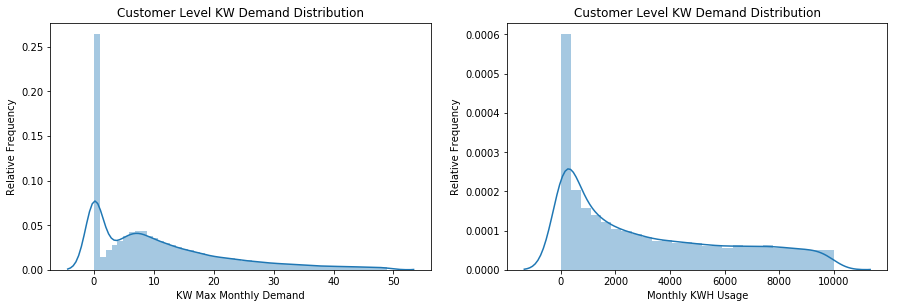

In [41]:
fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(custut.loc[custut['KW']<50]['KW'])
plt.xlabel('KW Max Monthly Demand')
plt.ylabel('Relative Frequency')
plt.title('Customer Level KW Demand Distribution')

plt.subplot(2,2,2)
sns.distplot(custut.loc[custut['KWH']<10000]['KWH'])
plt.xlabel('Monthly KWH Usage')
plt.ylabel('Relative Frequency')
plt.title('Customer Level KW Demand Distribution')

In [42]:
custut_sm=custut.loc[custut['KWH']<10000]
custut_sm=custut_sm.loc[custut['KW']<50]
custut_sm['bins']=pd.cut(custut_sm['KW'],20,include_lowest=True)

In [48]:
custut_sm.head()

,NAME,AM,Number of Meters (per customer),KWH,KW,Most Common Rate Schedule,bins
0,ANGEL CAFE,0,1,49860,21,23,"(19.6, 22.05]"
1,AWS - AT&T WIRELESS,1,2,67081,10,23,"(9.8, 12.25]"
2,FINLAYSON ENGINEERING INC,0,1,3005,11,23,"(9.8, 12.25]"
3,FLOW QUIP MINING INDUSTRIAL,0,1,35001,23,23,"(22.05, 24.5]"
5,SABROSO REGIONAL MEXICAN FOOD,0,1,14973,17,23,"(14.7, 17.15]"


([<matplotlib.axis.XTick at 0x1c58607c668>,
 <a list of 5 Text xticklabel objects>)

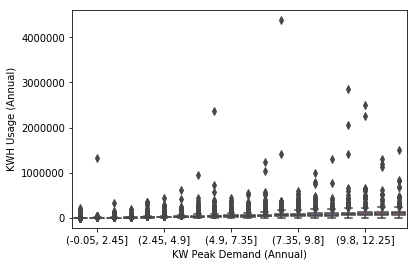

In [52]:
sns.boxplot(x=custut_sm['bins'],y=custut_sm['KWH'])
plt.xlabel('KW Peak Demand (Annual)')
plt.ylabel('KWH Usage (Annual)')
plt.xticks(np.arange(1,20,step=4))

### Rate Schedule

c:\users\apetersen\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Relative Frequency')

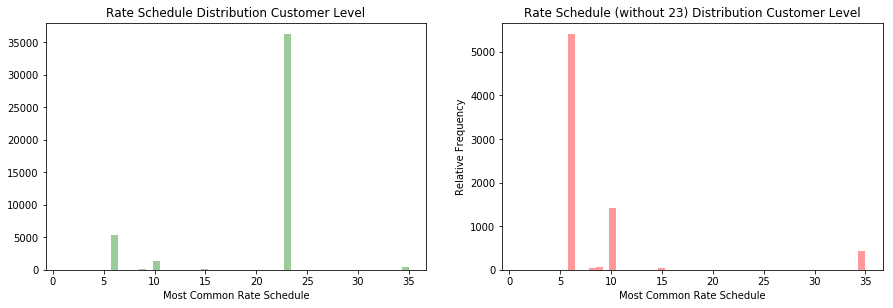

In [51]:
# Population Distribution
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(custut['Most Common Rate Schedule'],color='g',kde=False)
plt.title('Rate Schedule Distribution Customer Level')

plt.subplot(2,2,2)
sns.distplot(custut.loc[custut['Most Common Rate Schedule']!=23]['Most Common Rate Schedule'],color='r',kde=False)
plt.title('Rate Schedule (without 23) Distribution Customer Level')
plt.ylabel('Relative Frequency')

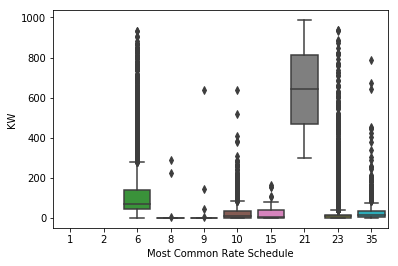

In [50]:
# separate distribution per rate schedule for KW demand
#custut_box=custut.loc[custut['KW']<1500]['KW']
#custut_box=y=custut.loc[custut['KWH']<5000000]
sns.boxplot(x=custut['Most Common Rate Schedule'],y=custut.loc[custut['KW']<1000]['KW'])

Thoughts: Discrete distributions that could help the model separate usage by rate schedule, however large number of outliers is concerning - going back to idea of client potentially leaving many customers on inappropriate rate schedules after construction.

### Managed

In [43]:
# separate managed and non managed customer level datasets
cust_nm=custut.loc[custut['AM']==0]
cust_m=custut.loc[custut['AM']==1]

In [44]:
print(cust_nm['NAME'].count(),
      cust_m['NAME'].count())

44215 729


Text(0.5, 1.0, 'Customer Level KW Demand Distribution')

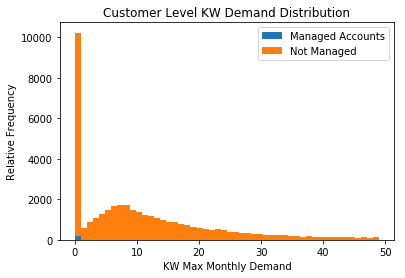

In [45]:
cust_nm1=cust_nm.loc[cust_nm['KW']<50]
cust_m1=cust_m.loc[cust_m['KW']<50]

plt.hist([cust_m1['KW'],cust_nm1['KW']],stacked=True,bins=50)
plt.legend(['Managed Accounts','Not Managed'])
plt.xlabel('KW Max Monthly Demand')
plt.ylabel('Relative Frequency')
plt.title('Customer Level KW Demand Distribution')

c:\users\apetersen\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Relative Frequency')

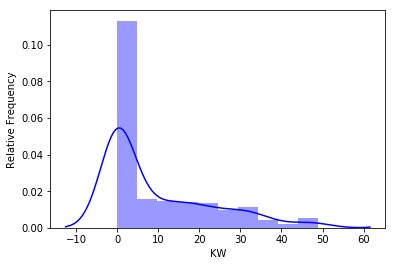

In [46]:
# zoomed, only managed

sns.distplot(cust_m1['KW'],color='b')
plt.ylabel('Relative Frequency')

In [47]:
print("Not managed:",cust_nm['KW'].quantile([.25,.5,.75]),
"Managed:",cust_m['KW'].quantile([.25,.5,.75]))

Not managed: 0.25     2.0
0.50    10.0
0.75    23.0
Name: KW, dtype: float64 Managed: 0.25      4.0
0.50     74.0
0.75    438.0
Name: KW, dtype: float64


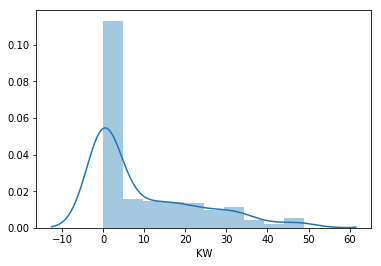

In [48]:
sns.distplot(cust_m1['KW'])

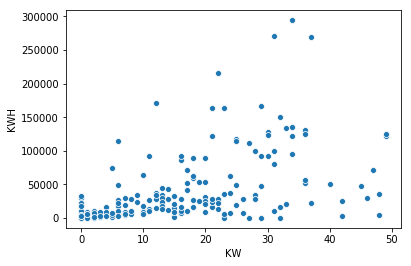

In [49]:
# energy usage per KW Demand
cust_m1=df_vfilter(cust_m1,'KWH',lvalue=300000,gvalue=0)
sns.scatterplot(x=cust_m1['KW'],y=cust_m1['KWH'])

#### Actively Managed

In [38]:
# separation of actively and reactively managed accounts (Key Account Customer List from Lin)
acv_managed=pd.read_csv('Datasets/RMP_activeacct_UT.csv',header=None)
acv_managed['Actively Managed']=2
acv_managed.rename(columns={0:'NAME'},inplace=True)
acv_managed['NAME']=acv_managed['NAME'].str.upper()
acv_managed.sort_values('NAME',inplace=True)
acv_managed.head()
#acv_managed.sort_values('NAME')

,NAME,Actively Managed
60,ACTAVIAS-TEVA (WATSON PHARMACEUTICAL),2
9,ADMIRAL BEVERAGE,2
61,"ADVANCED DRAINAGE SYSTEMS, INC.",2
0,"AIRGAS USA, LLC",2
18,ALBANY ENGINEERED COMPOSITES,2


In [39]:
# Dataframes could not merge until I stripped unseen whitespaces
custut['NAME']=custut['NAME'].str.strip()

In [40]:
active=pd.merge(custut,acv_managed,on='NAME',how='left')
active.head()

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Actively Managed
0,ANGEL CAFE,64098894,0,1,74340,23,12,23,6195.0,NaN
1,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,NaN
2,FINLAYSON ENGINEERING INC,10006535,0,1,4494,11,12,23,374.0,NaN
3,FLOW QUIP MINING INDUSTRIAL,13375654,0,1,76655,26,12,23,6388.0,NaN
4,HAMBLIN #527 INC,26572806,0,1,283320,100,12,6,23610.0,NaN


In [41]:
active.loc[active['Actively Managed']==2]['Actively Managed'].sum()

152.0

In [42]:
print("Actively managed accounts not in usage data:",active['AM'].isnull().sum(),". Percentage of actively managed:",np.round(100*active['AM'].isnull().sum()/active.loc[active['AM']==1]['AM'].count(),2),"%")   

Actively managed accounts not in usage data: 0 . Percentage of actively managed: 0.0 %


In [43]:
# replace NAN in AM with a 2 to represent actively managed
active.fillna(value={'Actively Managed':active['AM']},inplace=True)
#active.fillna(value={'Actively Managed':0},inplace=True)
active.head()

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Actively Managed
0,ANGEL CAFE,64098894,0,1,74340,23,12,23,6195.0,0.0
1,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0
2,FINLAYSON ENGINEERING INC,10006535,0,1,4494,11,12,23,374.0,0.0
3,FLOW QUIP MINING INDUSTRIAL,13375654,0,1,76655,26,12,23,6388.0,0.0
4,HAMBLIN #527 INC,26572806,0,1,283320,100,12,6,23610.0,0.0


In [44]:
# remove nan from unkown matches
active['Actively Managed'].isnull().sum()

0

In [45]:
custut.sort_values(by='KWH',ascending=False)

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo
44169,US MAGNESIUM LLC,45410411,1,2,801342120,129846,24,2,33389255.0
30304,NUCOR STEEL,53210536,1,3,607679748,102144,36,1,16879993.0
16819,GRANITE SCHOOL DISTRICT,11963176,1,179,74395661,1075,2081,6,35750.0
21852,JORDAN SCHOOL DISTRICT,32406396,1,87,44859533,778,1004,6,44681.0
1779,ALPINE SCHOOL DISTRICT,55141486,1,135,43922733,931,1418,6,30975.0
45499,WAL-MART,24894486,1,33,40953908,915,330,6,124103.0
36790,SALT LAKE COUNTY,18350886,1,276,37699155,629,3124,23,12068.0
38595,SMITHS FOOD & DRUG STORES,12843146,1,36,36115729,500,420,6,85990.0
11134,DAVIS COUNTY SCHOOL DISTRICT,52792216,1,183,36046299,730,2039,23,17678.0
17628,HARMONS,24468256,1,18,34526985,630,210,6,164414.0


In [46]:
active.sort_values(by='KWH',ascending=False)

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Actively Managed
44169,US MAGNESIUM LLC,45410411,1,2,801342120,129846,24,2,33389255.0,2.0
30304,NUCOR STEEL,53210536,1,3,607679748,102144,36,1,16879993.0,1.0
16819,GRANITE SCHOOL DISTRICT,11963176,1,179,74395661,1075,2081,6,35750.0,1.0
21852,JORDAN SCHOOL DISTRICT,32406396,1,87,44859533,778,1004,6,44681.0,1.0
1779,ALPINE SCHOOL DISTRICT,55141486,1,135,43922733,931,1418,6,30975.0,1.0
45499,WAL-MART,24894486,1,33,40953908,915,330,6,124103.0,1.0
36790,SALT LAKE COUNTY,18350886,1,276,37699155,629,3124,23,12068.0,1.0
38595,SMITHS FOOD & DRUG STORES,12843146,1,36,36115729,500,420,6,85990.0,1.0
11134,DAVIS COUNTY SCHOOL DISTRICT,52792216,1,183,36046299,730,2039,23,17678.0,1.0
17628,HARMONS,24468256,1,18,34526985,630,210,6,164414.0,1.0


In [47]:
sns.distplot(custut_am['KW'])

NameError: name 'custut_am' is not defined

In [48]:
custut_am1=df_vfilter(custut_am,'KW',lvalue=10000,gvalue=0)
sns.distplot(custut_am1['KW'])

NameError: name 'custut_am' is not defined

In [49]:
# actively managed compared to just managed accounts
#cust_nm1=cust_nm.loc[cust_nm['KW']<50]
#cust_m1=cust_m.loc[cust_m['KW']<50]

cust_m2=cust_m.loc[cust_m['KW']<1500]
custut_am2=custut_am.loc[custut_am['KW']<1500]

plt.hist([custut_am2['KW'],cust_m2['KW']],stacked=True,bins=50,density=True)
plt.legend(['Actively Managed','Managed Accounts'])
plt.xlabel('KW Max Monthly Demand')
#plt.ylabel('Relative Frequency')
plt.title('Customer Level KW Demand Distribution')

NameError: name 'cust_m' is not defined

Thoughts: There's so few actively managed accounts, it's hard to determine anything.

### Not Managed

In [ ]:
# Shows how much KW demand each rate schedule needs (as a sum), but not where most customers are
sns.barplot(x=cust_nm['Most Common Rate Schedule'],y=cust_nm['KW'],palette='rocket')
plt.ylabel=('KW Peak Demand (monthly)')
plt.title('Peak Demand Power Usage (KW)')

In [ ]:
sns.distplot(cust_nm['Most Common Rate Schedule'],kde=False)

In [ ]:
sns.jointplot('Most Common Rate Schedule','KW',data=cust_nm,color='m')

### Number of Meters

In [ ]:
sns.distplot(cust_nm1['KW'])

__Number of Meters__

In [ ]:
sns.scatterplot(x=custUsageUt['Number of Meters (per customer)'],y=custUsageUt['KWH'])

In [ ]:
# too zoomed out, get rid of outliers
custUsageUt_1=df_vfilter(custUsageUt,'KWH',lvalue=800000,gvalue=0)


In [ ]:
plt_meter_scat=sns.scatterplot(x=custUsageUt_1['Number of Meters (per customer)'],y=custUsageUt_1['KWH'])
plt.show()

* Customers with high numbers of meters have higher usage, however the reverse is not true.
* Could be useful parameter for high usage, but not low usage
* if number of meters is high, they are not a small customer, etc...

In [ ]:
# number of meters distribution
#df_revclass_ind1=df_vfilter(df_revclass_ind,'KWH',lvalue=1000,gvalue=0)

custUsageUt_2=df_vfilter(custUsageUt,'Number of Meters (per customer)',lvalue=60,gvalue=0)
plt_meter_hist=sns.distplot(custUsageUt_2['Number of Meters (per customer)'],kde=False,color='g')
plt.title("Number of Meters per Customer Distribution")
plt.xlabel("Number of Meters per Customer")
#plt.ylabel("Relative Frequency")

Thoughts: 

* Very promising histogram! There seems to be more discrete groups here.

## Site Level Exploratoration

In [ ]:
# group the meters by the customer who owns them. Essentially a pivot table in Excel.
# KW is max demand since previous read (~month), so I should select max, not sum. Also, total max or average year?
# number of meters is not a sum of all appearances, as data are taken several times. 

ut_site=dfut.groupby(['NAME','SITE_ID','AM']).agg({'METER_EQUIPMENT_SERIAL_CD':'nunique','KWH':sum,'KW':max,'PRICING_STRUCTURE_CD':max})
ut_site.rename(columns={'#CUSTOMER_ID':'CustomerId','METER_EQUIPMENT_SERIAL_CD':'Number of Meters (per site)','PRICING_STRUCTURE_CD':'Most Common Rate Schedule'},inplace=True)
ut_site.head(5)

In [ ]:
ut_site=flatten_aggregated_dataframe(ut_site)
ut_site.head()

### KW Usage

In [ ]:
sns.distplot(ut_site.loc[ut_site['KW']<50]['KW'],color='m')
#plt.ylabel('Relative Frequency')
plt.title('Population Distirbution of KW Demand at the Site level')

In [ ]:
# by rate schedule
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x=ut_site['Most Common Rate Schedule'],y=ut_site['KW'])
plt.title('KW Demand of Sites Most Common Rate Schedule')

plt.subplot(2,2,2)
sns.scatterplot(x=ut_site.loc[ut_site['Most Common Rate Schedule']>2]['Most Common Rate Schedule'],y=ut_site['KW'])
plt.title('Zoomed KW Demand of Sites Most Common Rate Schedule')

In [ ]:
#sns.jointplot(x=ut_site.loc[ut_site['Most Common Rate Schedule']>2]['Most Common Rate Schedule'],y=ut_site['KW'],kind='hex')
sns.jointplot(x=ut_site['Most Common Rate Schedule'],y=ut_site['KW'],kind='hex')

In [ ]:
sns.scatterplot(x=ut_site.loc[ut_site['KW']<200]['KW'],y=ut_site.loc[ut_site['KWH']<50000]['KWH'])
plt.ylabel('KWH')

### Number of Meters

# Participation Data

In [128]:
path = r'C:\Users\apetersen\Nexant Market Segmentation\Datasets\part_data_dsmcexport_clean.csv'
df = pd.read_csv(path,encoding='latin1')

Columns of interest:

* Project ID
* Project Name
* Program
* Schedule Rate
* Material Cost
* Labor Cost
* Other Cost
* Allowed Wattage
* Code LPD
* Project Incentives
* Project kWh
* Project Cost
* Project Incentives2
* Project SPB
* Project SPB w/o incentives
* Project kW Reduction
* Project Cost Savings
* Total Cost
* Project Count

In [129]:
for col in df.columns:
    print(col)

Program_Name
Project_Name
Project_Status
Customer Company Name
Utility Meter Number
Utility Rate ID
ProjectManager
Site State
Site Postal Code
Measure_Name
TotalCustomerIncPostInstalled
TotalIncreMeasCostPostInstalled


In [130]:
df.dtypes

Program_Name                       object
Project_Name                       object
Project_Status                     object
Customer Company Name              object
Utility Meter Number               object
Utility Rate ID                    object
ProjectManager                     object
Site State                         object
Site Postal Code                    int64
Measure_Name                       object
TotalCustomerIncPostInstalled      object
TotalIncreMeasCostPostInstalled    object
dtype: object

In [131]:
df.tail()

,Program_Name,Project_Name,Project_Status,Customer Company Name,Utility Meter Number,Utility Rate ID,ProjectManager,Site State,Site Postal Code,Measure_Name,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled
5228,2018 wattsmart Business - UT,WSBUT_80412,Completed,UTAHAMERICAN ENERGY INC,41186951,08GNSV0009,Non-Managed,UT,84501,Green Motor Rewinds (Industrial): 50 hp - UT,NaN,NaN
5229,2018 wattsmart Business - UT,WSBUT_80412,Completed,UTAHAMERICAN ENERGY INC,41186951,08GNSV0009,Non-Managed,UT,84501,Green Motor Rewinds (Industrial): 50 hp - UT,100.00,281.42
5230,2018 wattsmart Business - UT,WSBUT_80412,Completed,UTAHAMERICAN ENERGY INC,41186951,08GNSV0009,Non-Managed,UT,84501,Green Motor Rewinds (Industrial): 50 hp - UT,100.00,281.42
5231,2018 wattsmart Business - UT,WSBUT_80412,Completed,UTAHAMERICAN ENERGY INC,41186951,08GNSV0009,Non-Managed,UT,84501,Green Motor Rewinds (Industrial): 50 hp - UT,100.00,281.42
5232,2018 wattsmart Business - UT,WSBUT_80412,Completed,UTAHAMERICAN ENERGY INC,41186951,08GNSV0009,Non-Managed,UT,84501,Green Motor Rewinds (Industrial): 50 hp - UT,100.00,281.42


In [132]:
# convert measure cost and incentive to floats
df['TotalCustomerIncPostInstalled']=df['TotalCustomerIncPostInstalled'].str.strip().str.replace(',','').astype('float64')
df['TotalIncreMeasCostPostInstalled']=df['TotalIncreMeasCostPostInstalled'].str.strip().str.replace(',','').astype('float64')

In [133]:
df.dtypes

Program_Name                        object
Project_Name                        object
Project_Status                      object
Customer Company Name               object
Utility Meter Number                object
Utility Rate ID                     object
ProjectManager                      object
Site State                          object
Site Postal Code                     int64
Measure_Name                        object
TotalCustomerIncPostInstalled      float64
TotalIncreMeasCostPostInstalled    float64
dtype: object

In [134]:
# null values should be fine to get rid of with new dataframe, they are mostly duplicates it seems:
print(df['TotalIncreMeasCostPostInstalled'].isnull().sum(),
      df['TotalCustomerIncPostInstalled'].isnull().sum(),
      np.round(100*df['TotalIncreMeasCostPostInstalled'].isnull().sum()/df['Program_Name'].count()),"% of total data")

937 937 18.0 % of total data


In [135]:
# remove measure name column because measure costs and incentives are project totals
# For this same reason I will remove nulls
df.drop(labels='Measure_Name',axis=1, inplace=True)
df.dropna(inplace=True)

In [136]:
# remove duplicates, this should work well with the measure name removed (they were measure level of course, other info is at least project level)
df.drop_duplicates(inplace=True)

In [137]:
df.head()

,Program_Name,Project_Name,Project_Status,Customer Company Name,Utility Meter Number,Utility Rate ID,ProjectManager,Site State,Site Postal Code,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled
1,2018 wattsmart Business - UT,WSBUT_72783,Completed,AXIA ACQUISITION CORPORATION,50815340,08GNSV0023,Non-Managed,UT,84107,362.9,3988.0
6,2018 wattsmart Business - UT,WSBUT_72827,Completed,"PIONEER STORAGE, LLC",51304656,08GNSV0023,Non-Managed,UT,84054,110.5,1542.0
11,2018 wattsmart Business - UT,WSBUT_72828,Completed,LARRY H MILLER,61232438,08GNSV0006,Raenee Bugarske,UT,84070,2436.9,13640.0
16,2018 wattsmart Business - UT,WSBUT_72833,Completed,Liberty Wells Ext,28300748,08RGNSV006,Non-Managed,UT,84111,1146.7,5225.0
21,2018 wattsmart Business - UT,WSBUT_72842,Completed,UNIVERSITY OF UTAH,13715405,08PRSV031M,Raenee Bugarske,UT,84112,3023.3,30816.0


In [138]:
df.count()

Program_Name                       669
Project_Name                       669
Project_Status                     669
Customer Company Name              669
Utility Meter Number               669
Utility Rate ID                    669
ProjectManager                     669
Site State                         669
Site Postal Code                   669
TotalCustomerIncPostInstalled      669
TotalIncreMeasCostPostInstalled    669
dtype: int64

This seems far too low. This represents the number of projects _completed_ in 2018, for all applications (lighting, HVAC, etc.)

In [139]:
# Turn managed column into dummy variables, 0 for non, 1 for managed:
df['Managed']=df['ProjectManager'].str.replace('Non-Managed','0')
df['Managed'].loc[df['Managed']!='0']=1
df.head()

c:\users\apetersen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Program_Name,Project_Name,Project_Status,Customer Company Name,Utility Meter Number,Utility Rate ID,ProjectManager,Site State,Site Postal Code,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled,Managed
1,2018 wattsmart Business - UT,WSBUT_72783,Completed,AXIA ACQUISITION CORPORATION,50815340,08GNSV0023,Non-Managed,UT,84107,362.9,3988.0,0
6,2018 wattsmart Business - UT,WSBUT_72827,Completed,"PIONEER STORAGE, LLC",51304656,08GNSV0023,Non-Managed,UT,84054,110.5,1542.0,0
11,2018 wattsmart Business - UT,WSBUT_72828,Completed,LARRY H MILLER,61232438,08GNSV0006,Raenee Bugarske,UT,84070,2436.9,13640.0,1
16,2018 wattsmart Business - UT,WSBUT_72833,Completed,Liberty Wells Ext,28300748,08RGNSV006,Non-Managed,UT,84111,1146.7,5225.0,0
21,2018 wattsmart Business - UT,WSBUT_72842,Completed,UNIVERSITY OF UTAH,13715405,08PRSV031M,Raenee Bugarske,UT,84112,3023.3,30816.0,1


In [140]:
# incentive percentage of cost
df=df.loc[df['TotalIncreMeasCostPostInstalled']>0]
df['incentiverate']=100*df['TotalCustomerIncPostInstalled']/df['TotalIncreMeasCostPostInstalled']
df=df.loc[df['incentiverate']>0]

In [141]:
df.rename(columns={'Customer Company Name':'NAME'},inplace=True)

In [142]:
df['NAME']=df['NAME'].str.upper()

In [160]:
df['NAME']

1             AXIA ACQUISITION CORPORATION
6                     PIONEER STORAGE, LLC
11                          LARRY H MILLER
16                       LIBERTY WELLS EXT
21                      UNIVERSITY OF UTAH
26                         PC LAKEVIEW LLC
31                       HAMILTON PARK INC
37               INTERMOUNTAIN HEALTH CARE
46                IHC HEALTH SERVICES INC.
51                 HUDSON PRINTING COMPANY
56                   OGDEN HOSPITALITY LLC
60                             LAYTON CITY
69                           TARGET STORES
74              SALT LAKE CITY CORPORATION
84                     BROWN STRAUSS STEEL
109      VALLEY MENTAL HEALTH/SAFE HAVEN I
114     VALLEY MENTAL HEALTH/SAFE HAVEN II
119                       G & S PROPERTIES
125                          VULCRAFT CORP
137                          MAVERIK, INC.
154                     UNIVERSITY OF UTAH
162                          MAVERIK, INC.
179                           ALL-STOR LLC
183        

In [156]:
# Join with main dataframe to get KW demand (just intersection)
part=pd.merge(custut,df,on='NAME',how='inner')
part.head()

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Program_Name,...,Project_Status,Utility Meter Number,Utility Rate ID,ProjectManager,Site State,Site Postal Code,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled,Managed,incentiverate
0,ALBANY AEROSTRUCTURES COMPOSITES LL,66208849,1,6,5036700,1108,63,6,79948.0,2018 wattsmart Business - UT,...,Completed,28819716,08GNSV0008,Raenee Bugarske,UT,84116,1759.64,17857.00,1,9.854063
1,BAY PACIFIC AMERICAN PLAZA II & III,57397053,0,2,2292240,308,24,6,95510.0,2018 wattsmart Business - UT,...,Completed,90019352,08GNSV0006,Non-Managed,UT,84101,1947.60,5063.76,0,38.461538
2,BPP PACIFIC INDUSTRIAL UT NON- REIT,20164653,0,1,1742000,465,12,6,145167.0,2018 wattsmart Business - UT,...,Completed,28727446,08GNSV0006,Non-Managed,UT,84104,10661.38,21337.54,0,49.965366
3,"ECLIPSE COMPOSITES ENGINEERING, LLC",40853782,0,3,191760,82,11,6,17433.0,2018 wattsmart Business - UT,...,Completed,3678068,08GNSV0006,Non-Managed,UT,84065,511.25,3010.00,0,16.985050
4,GRANGER HUNTER IMPROVEMENT DISTRICT,25876026,1,60,8463554,412,675,23,12539.0,2018 wattsmart Business - UT,...,Completed,23585186,08GNSV0006,Non-Managed,UT,84119,800.00,11184.31,0,7.152878


In [144]:
part['Managed'].unique()

array([1, '0'], dtype=object)

In [145]:
part['Managed']=part['Managed'].astype('int');
part['Managed'].dtype

dtype('int32')

In [77]:
ptbin=pd.DataFrame()
ptbins=pd.cut(part['KW'],20,include_lowest=True)
ptbin['bins']=ptbins
ptbin.head()

,bins
0,"(55.4, 110.8]"
1,"(277.0, 332.4]"
2,"(554.0, 609.4]"
3,"(-1.109, 55.4]"
4,"(110.8, 166.2]"


In [78]:
part=part.join(ptbin)

In [79]:
part1=part.loc[part['incentiverate']<100]
part1=part1.sort_values(by='bins')

In [80]:
for item in part1['bins'].unique():
    print(item)

(-1.109, 55.4]
(55.4, 110.8]
(110.8, 166.2]
(166.2, 221.6]
(221.6, 277.0]
(277.0, 332.4]
(332.4, 387.8]
(387.8, 443.2]
(443.2, 498.6]
(498.6, 554.0]
(554.0, 609.4]
(609.4, 664.8]
(664.8, 720.2]
(720.2, 775.6]
(775.6, 831.0]
(831.0, 886.4]
(886.4, 941.8]
(1052.6, 1108.0]


([<matplotlib.axis.XTick at 0x22c825ca4e0>,
 <a list of 5 Text xticklabel objects>)

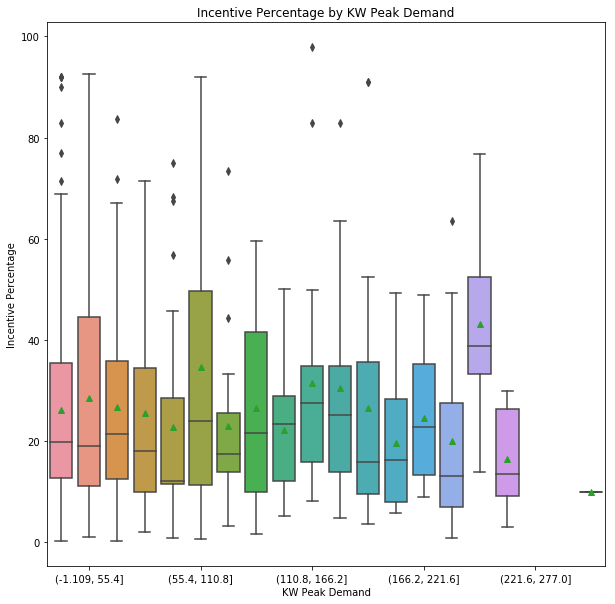

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(x=part1['bins'],y=part1['incentiverate'],showmeans=True)
plt.title('Incentive Percentage by KW Peak Demand')
plt.xlabel('KW Peak Demand')
plt.ylabel('Incentive Percentage')
plt.xticks(np.arange(1,20,4))

In [82]:
part['KW'].describe()

count     676.000000
mean      248.180473
std       253.154182
min         0.000000
25%        46.750000
50%       133.000000
75%       409.750000
max      1108.000000
Name: KW, dtype: float64

# Report

## Why We Should Segment

* Use participation data
* is customer data all of RMP customers? ie is participation number/customer number = participation rate
* plot participation rate vs. KW Demand (what groups are participating moer?) stacked bar
* plot total incentive/project cost (on customer level) vs. KW Demand (What groups are getting the most)

In [111]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [84]:
kwbins=(55,111,166,222,277,332,388,443,499,554,609,665,720,776,831,886,942,1108)

c:\users\apetersen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


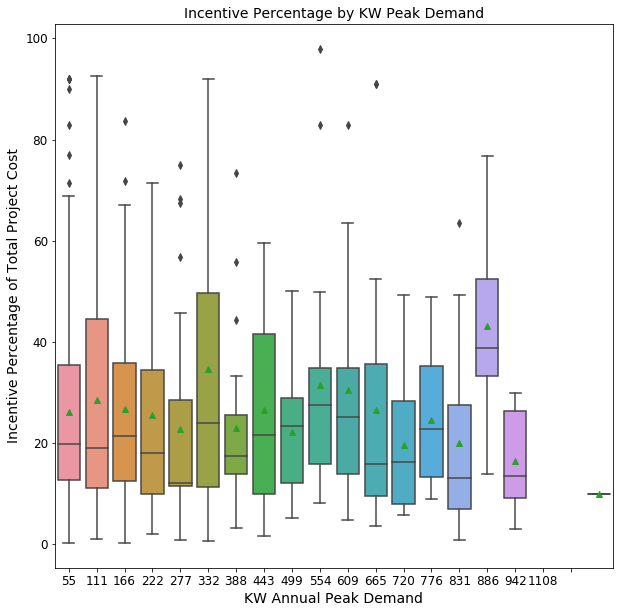

In [86]:
#custut_sm['KWH']=custut.loc[custut['KWH']<10000]['KWH']
#custut_sm['KW']=custut.loc[custut['KW']<50]['KW']
plt.figure(figsize=(10,10))
part1=part.loc[part['incentiverate']<100]
part1['bins']=pd.cut(part1['KW'],20,include_lowest=True)
sns.boxplot(x=part1['bins'],y=part1['incentiverate'],showmeans=True)
#sns.swarmplot(x=part1['bins'],y=part1['incentiverate'],color='.25')
plt.title('Incentive Percentage by KW Peak Demand')
plt.xlabel('KW Annual Peak Demand')
plt.ylabel('Incentive Percentage of Total Project Cost')
plt.xticks(np.arange(0,19,1),kwbins)
plt.show()

Thoughts:

1. Assumption: incentive rate is project incentive per project cost.
2. High KW demand customers are on average receiving the highest incentive rates. ie they are getting more of their capital costs covered
3. There is high variability in the means of the data per KW peak demand bin.

Conclusion:

A market segment would allow Nexant and clients to target specified segments to provide less variability in incentive rates and control participation in a more precise manner. In addition, participation could be controlled via incentive structures per segment.

## How We Should Segment

Potential Parameters:

1. KW Demand
2. KWH Usage Rate
3. Rate Schedule
4. Managed
5. Number of Meters

### KW Demand and KWH Usage

Customer Level, pulled form DSMC when user grabs Rate schedule in tool

In [256]:
custut_sm=df_norm.loc[df_norm['KWHreal']<150000]
custut_sm=custut_sm.loc[custut_sm['KWreal']<600]

In [257]:
dfbin=pd.DataFrame()
bins=pd.cut(custut_sm['KWreal'],20,include_lowest=True)
dfbin['bins']=bins
dfbin.head()

,bins
0,"(0.402, 30.85]"
1,"(0.402, 30.85]"
2,"(0.402, 30.85]"
3,"(0.402, 30.85]"
4,"(90.55, 120.4]"


In [258]:
custut_sm=custut_sm.join(dfbin)
custut_sm.head()

,KW,KWHmo,AM,NAME,ID,Segment,KWreal,KWHreal,area,KWKWH,bins
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,0,23.0,6195.0,0.001594,3.442107e+07,"(0.402, 30.85]"
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,3820.0,0.000470,1.015106e+07,"(0.402, 30.85]"
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535,0,11.0,374.0,0.000046,9.938469e+05,"(0.402, 30.85]"
3,0.043478,0.042729,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,0,26.0,6388.0,0.001858,4.012300e+07,"(0.402, 30.85]"
4,0.167224,0.157926,0.0,HAMBLIN #527 INC,26572806,2,100.0,23610.0,0.026409,5.703628e+08,"(90.55, 120.4]"


In [259]:
labels=[]
for i in custut_sm['bins'].sort_values().unique():
    #print(i)
    labels.append(i)
labels

[Interval(0.402, 30.85, closed='right'),
 Interval(30.85, 60.7, closed='right'),
 Interval(60.7, 90.55, closed='right'),
 Interval(90.55, 120.4, closed='right'),
 Interval(120.4, 150.25, closed='right'),
 Interval(150.25, 180.1, closed='right'),
 Interval(180.1, 209.95, closed='right'),
 Interval(209.95, 239.8, closed='right'),
 Interval(239.8, 269.65, closed='right'),
 Interval(269.65, 299.5, closed='right'),
 Interval(299.5, 329.35, closed='right'),
 Interval(329.35, 359.2, closed='right'),
 Interval(359.2, 389.05, closed='right'),
 Interval(389.05, 418.9, closed='right'),
 Interval(418.9, 448.75, closed='right'),
 Interval(448.75, 478.6, closed='right'),
 Interval(478.6, 508.45, closed='right'),
 Interval(508.45, 538.3, closed='right'),
 Interval(538.3, 568.15, closed='right'),
 Interval(568.15, 598.0, closed='right')]

In [260]:
custut_sm['labels']=custut_sm['bins'].astype(str)

In [272]:
custut_sm['labels']=custut_sm['labels'].str[-6:-1].str.strip()

In [273]:
xlabel=custut_sm['labels'].unique()

In [274]:
xlabel=xlabel.astype('float64')


In [275]:
xlabel

array([ 30., 120.,  60.,   8.,  69.,  29.,   9.,  90., 598.,  89., 239.,
       180.,  50., 299., 418., 359.,  48., 478.,  68., 538.])

In [276]:
xlabel.sort(axis=0)
#xlabel.round()

In [277]:
xlabel

array([  8.,   9.,  29.,  30.,  48.,  50.,  60.,  68.,  69.,  89.,  90.,
       120., 180., 239., 299., 359., 418., 478., 538., 598.])

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


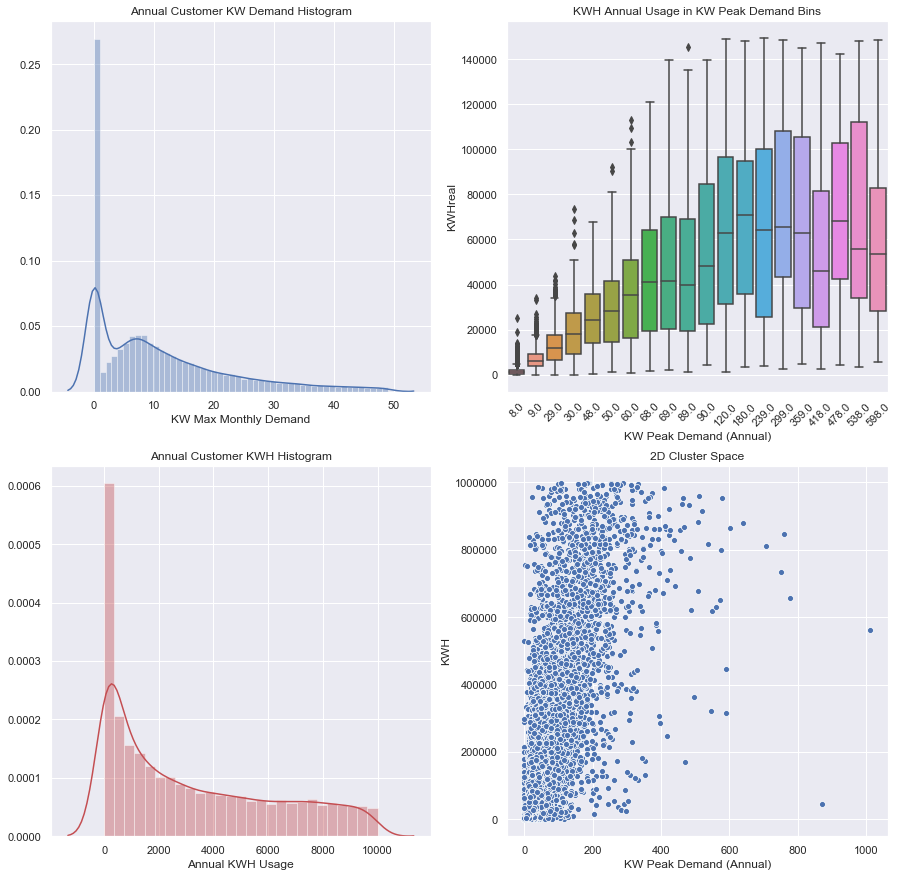

In [281]:
sns.set()
fig=plt.figure(figsize=(15,15))

# KW Demand Plots
plt.subplot(2,2,1)
sns.distplot(custut.loc[custut['KW']<50]['KW'])
plt.xlabel('KW Max Monthly Demand')
plt.title('Annual Customer KW Demand Histogram')

plt.subplot(2,2,2)
sns.boxplot(x=custut_sm['bins'],y=custut_sm['KWHreal'])
#plt.xticks(np.arange(1,20,step=4))
plt.xticks(np.arange(0,20,1),xlabel,rotation=45)
plt.xlabel('KW Peak Demand (Annual)')
#plt.ylabel('KWH Usage (Annual)')
plt.title('KWH Annual Usage in KW Peak Demand Bins')

plt.subplot(2,2,3)
sns.distplot(custut.loc[custut['KWH']<10000]['KWH'],color='r')
plt.xlabel('Annual KWH Usage')
plt.title('Annual Customer KWH Histogram')

plt.subplot(2,2,4)
sns.scatterplot(x=custut['KW'],y=custut.loc[custut['KWH']<1000000]['KWH'])
plt.xlabel('KW Peak Demand (Annual)')
plt.title('2D Cluster Space')
plt.show()

Thoughts:
    
    * KWH Annual Usage is a good candidate as a segmentation factor, it differs from KW Peak Demand (they aren't perfectly correlated).
    * KW and KWH addresses scenarios where customers have high peaks but don't use much power over time and vice versa.

### Rate Schedule

Project Level, pulled from DSMC. Could be used to account for a large customer conducting a smaller project

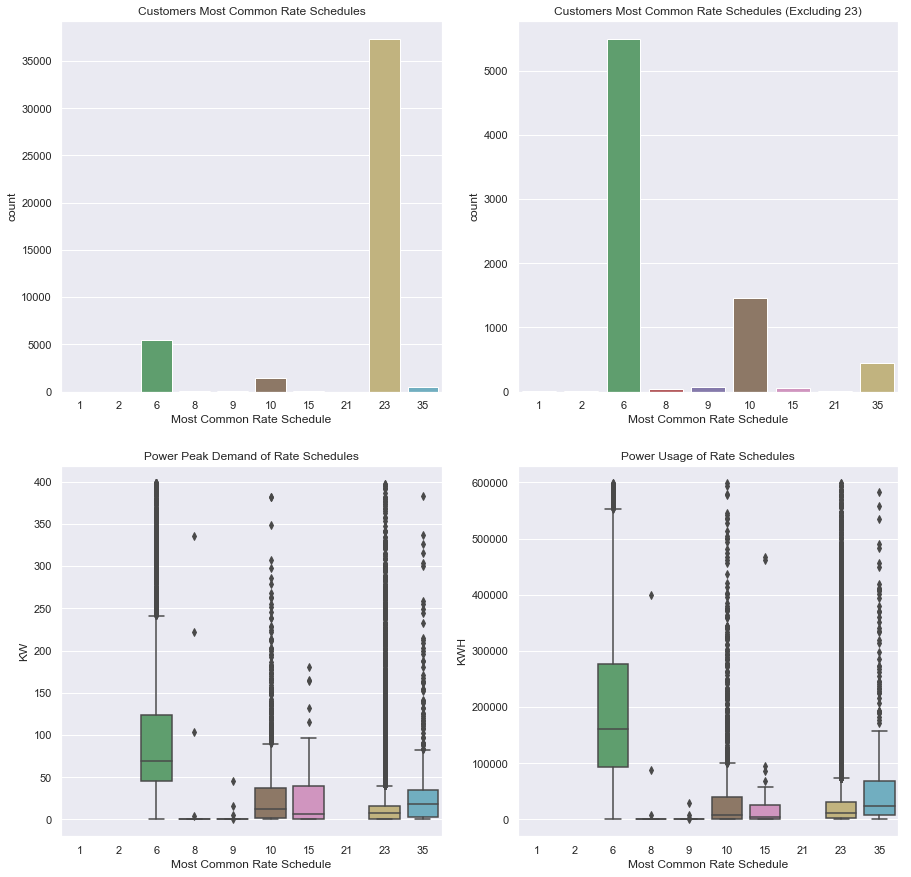

In [91]:
fig=plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(custut['Most Common Rate Schedule'])
plt.title('Customers Most Common Rate Schedules')

plt.subplot(2,2,2)
sns.countplot(custut.loc[custut['Most Common Rate Schedule']!=23]['Most Common Rate Schedule'])
plt.title('Customers Most Common Rate Schedules (Excluding 23)')

plt.subplot(2,2,3)
sns.boxplot(x=custut['Most Common Rate Schedule'],y=custut.loc[custut['KW']<400]['KW'])
plt.title("Power Peak Demand of Rate Schedules")

plt.subplot(2,2,4)
sns.boxplot(x=custut['Most Common Rate Schedule'],y=custut.loc[custut['KWH']<600000]['KWH'])
plt.xlabel('Most Common Rate Schedule')
plt.title("Power Usage of Rate Schedules")
plt.show()

Thoughts:
    
    Note: counts of rate schedules on the meter level have the same pattern.
    Note: By Tukey's rule for outliers, 0.7% of the data is beyond the outtee fence. 99.3% of the data is contained within
1. Some rate schedules seem to have good separation of KW Peak Demand. Consider a rate schedule of 6 to that of 10 or 23. 
2. Issues may come from high number of outliers, this leads back to discussion of client potentially leavings customers on inappropriate rate schedules after construction
3. Some rate schedules also have good separation from KWH usage. Consider 6, 35, and the rest of the rate schedules.
4. Notice between KW and KWH anomolies such as rate schedules 8 and 15, with higher KW peak demand (at least the upper 25%), but much lower annual KWH. 

Conclusion:

1. Rate schedule can be an important parameter for segmenting, with decent separation for both KW and KWH parameters. Further, it's addition to the model would allow for distinction of anomolies such as rate schedule 8 and 15, where customers have medium to high KW demand, but low KWH annual usage.
2. With the high amount of outliers in rate schedule 23 we may want to exclude this parameter to remain conservative.

### Managed

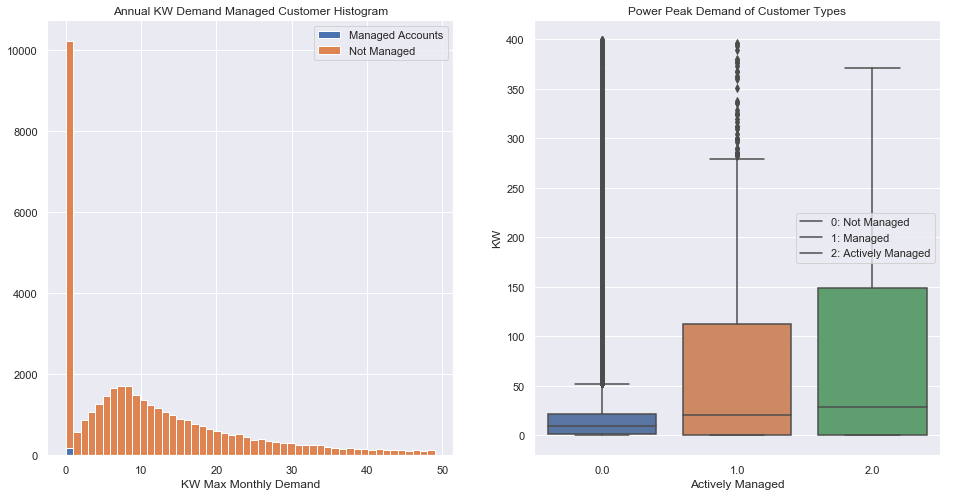

In [92]:
cust_nm1=cust_nm.loc[cust_nm['KW']<50]
cust_m1=cust_m.loc[cust_m['KW']<50]

fig=plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.hist([cust_m1['KW'],cust_nm1['KW']],stacked=True,bins=50)
plt.legend(['Managed Accounts','Not Managed'])
plt.xlabel('KW Max Monthly Demand')
plt.title('Annual KW Demand Managed Customer Histogram')

#y=custut.loc[cust_nm['KW']<10000]['KW']
plt.subplot(1,2,2)
sns.boxplot(x=active['Actively Managed'],y=active.loc[active['KW']<400]['KW'])
plt.title('Power Peak Demand of Customer Types')
plt.legend(['0: Not Managed','1: Managed','2: Actively Managed'])
plt.show()

In [93]:
# comparison of quartiles
cust_nm['KW'].quantile([.25,.5,.75])

0.25     2.0
0.50    10.0
0.75    23.0
Name: KW, dtype: float64

In [94]:
cust_m['KW'].quantile([.25,.5,.75])

0.25      4.0
0.50     74.0
0.75    438.0
Name: KW, dtype: float64

Thoughts:

1. Managed accounts are a very small percentage of the total number of program participants. 
2. The boxplot shows that actively managed accounts have a very large spread of KW peak demand in comparison to non managed accounts
3. There is little difference in actively managed accounts, but they do have an expected higher spread usage of peak demands.

Conclusion:

1. If the customer happens to not be managed, they have a very high probability of not having a high peak KW demand, which could lead to this being a good parameter.
2. There are a high number of outliers for non managed accounts, but keep in mind that is 0.7% of the data.
3. If we use this parameter, we should not separate out whether the customer is _actively_ managed, simply whether they are managed or not.

### Number of Meters

Customer Level

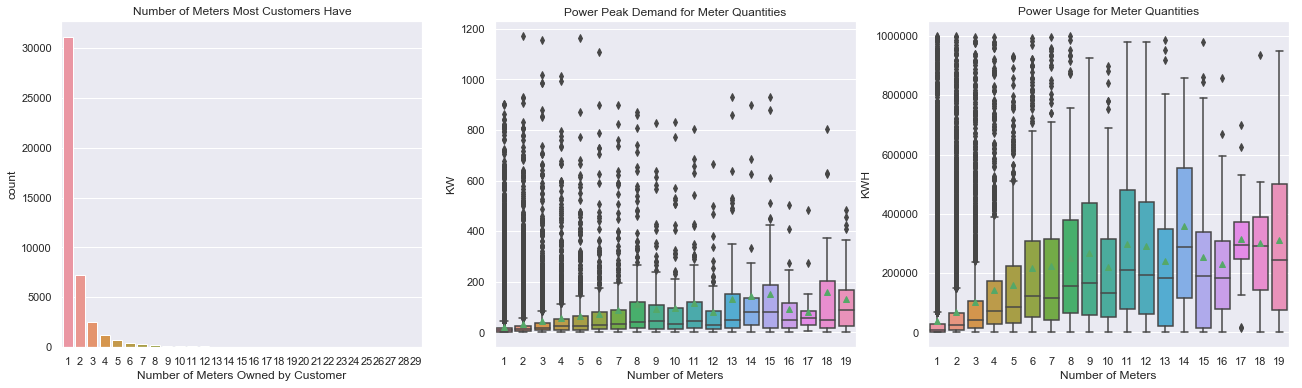

In [95]:
fig=plt.figure(figsize=(22,6))

plt.subplot(1,3,1)
sns.countplot(custut.loc[custut['Number of Meters (per customer)']<30]['Number of Meters (per customer)'])
plt.xlabel('Number of Meters Owned by Customer')
plt.title('Number of Meters Most Customers Have')

plt.subplot(1,3,2)
sns.boxplot(custut.loc[custut['Number of Meters (per customer)']<20]['Number of Meters (per customer)'],custut.loc[custut['KW']<1200]['KW'],showmeans=True)
plt.xlabel('Number of Meters')
plt.title('Power Peak Demand for Meter Quantities')

plt.subplot(1,3,3)
sns.boxplot(custut.loc[custut['Number of Meters (per customer)']<20]['Number of Meters (per customer)'],custut.loc[custut['KWH']<1000000]['KWH'],showmeans=True)
plt.xlabel('Number of Meters')
plt.title('Power Usage for Meter Quantities')
plt.show()

Thoughts:

1. Most customers have well below 20 meters
2. There is a general positive trend, the more meters a customer has - the higher their peak KW demand. Interesting decrease past about 15 meters
3. Distributions are not  very discrete and don't seem like particularly good indications of KW demand.

### Parameter Conclusion

1. KW Demand, KWH Annual Usage, rate schedule, and managed accounts are all good parameters to be included in the clustering model.
2. Number of meters is not a good parameter to cluster by
3. Discrete values (managed accounts and rate schedule) will require using the Mahalonobis distance in the clusteirng algorithm (more time)

# Proposed Models

I propose four possible models:

1. One dimensional "KW Demand" by Clustering Model
2. One dimensional "KW Demand" by quartiles
3. Two dimensional "KW Demand, Annual KWH Usage"
4. Three dimensional "KW Demand, Annual KWH Usage, Rate Schedule"

#### One Dimension

In [96]:
custut['KW'].describe()

count     44944.000000
mean         34.945955
std         782.937838
min           0.000000
25%           2.000000
50%          10.000000
75%          23.000000
max      129846.000000
Name: KW, dtype: float64

In [97]:
custut[['KW']].values

array([[23],
       [11],
       [11],
       ...,
       [ 9],
       [ 6],
       [32]], dtype=int64)

In [98]:
custut['KW'].max()

129846

In [99]:
from sklearn import preprocessing

custut_model=custut.loc[custut['KWH']<1000000]
custut_model=custut_model.loc[custut_model['KW']<400]

#normalize
minmax=preprocessing.MinMaxScaler()
kwscale=minmax.fit_transform(custut_model[['KW']].values)
#kwhscale=minmax.fit_transform(custut[['KWH']].values)
df_norm1d=pd.DataFrame(kwscale)
df_norm1d.rename(columns={0:'KW'},inplace=True)
df_norm1d.head()

c:\users\apetersen\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,KW
0,0.057644
1,0.027569
2,0.027569
3,0.065163
4,0.250627


In [100]:
df_norm1d.dropna(inplace=True)

In [101]:
X1d=np.array(list(zip(df_norm1d['KW'].values)))
X1d

array([[0.05764411],
       [0.02756892],
       [0.02756892],
       ...,
       [0.02255639],
       [0.01503759],
       [0.0802005 ]])

In [46]:
from sklearn.cluster import KMeans

kmeans1d=KMeans(n_clusters=3).fit(X1d)

labels1d=kmeans1d.predict(X1d)

centroids1d=kmeans1d.cluster_centers_

NameError: name 'X1d' is not defined

In [103]:
print(centroids1d)

[[0.17701506]
 [0.02521184]
 [0.49658283]]


In [104]:
custut_model['KWH'].max()

999963

## Two Dimensions

In [50]:
# active and customer dataframes do have the same spread!
active.head(5)

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Actively Managed
0,ANGEL CAFE,64098894,0,1,74340,23,12,23,6195.0,0.0
1,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0
2,FINLAYSON ENGINEERING INC,10006535,0,1,4494,11,12,23,374.0,0.0
3,FLOW QUIP MINING INDUSTRIAL,13375654,0,1,76655,26,12,23,6388.0,0.0
4,HAMBLIN #527 INC,26572806,0,1,283320,100,12,6,23610.0,0.0


In [51]:
active['KWH'].describe()

count    4.749300e+04
mean     1.698610e+05
std      4.707002e+06
min      0.000000e+00
25%      3.353000e+03
50%      1.465400e+04
75%      5.365300e+04
max      8.013421e+08
Name: KWH, dtype: float64

In [52]:
custut['KWH'].describe()

count    4.749300e+04
mean     1.698610e+05
std      4.707002e+06
min      0.000000e+00
25%      3.353000e+03
50%      1.465400e+04
75%      5.365300e+04
max      8.013421e+08
Name: KWH, dtype: float64

In [53]:
# Currently filters so that 99% of data remains. 
# given to Van: <300000
# <800
active_model=active.loc[active['KWHmo']<150000]
active_model=active_model.loc[active_model['KWHmo']>0]

active_model=active_model.loc[active_model['KW']<600]
active_model=active_model.loc[active_model['KW']>0]

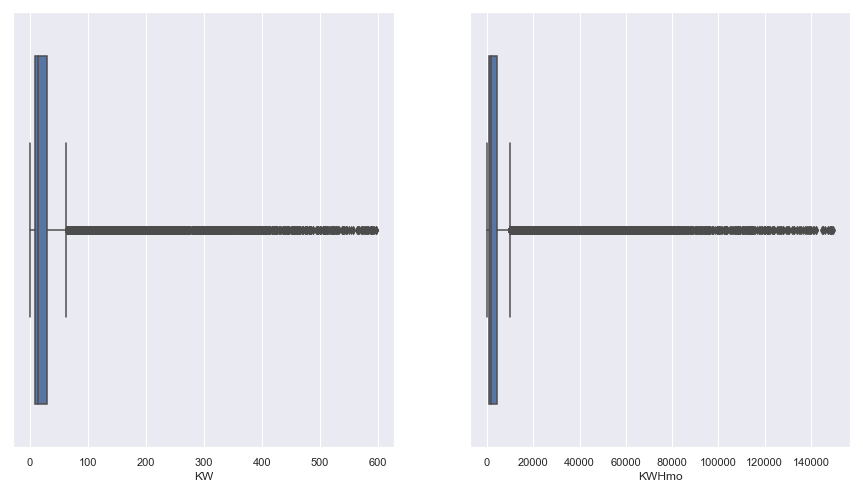

In [54]:
# determine outliers to filter data by
sns.set()
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(x=active_model['KW'])

plt.subplot(1,2,2)
sns.boxplot(x=active_model['KWHmo'])

In [55]:
# determine outter fences
kw_fence=(1.5*(active['KW'].quantile(.75)-active['KW'].quantile(.25)))+active['KW'].quantile(.75)
kwh_fence=(1.5*(active['KWHmo'].quantile(.75)-active['KWHmo'].quantile(.25)))+active['KWHmo'].quantile(.75)
kw_fence

54.5

In [56]:
# remove top 1% of outliers
active_model.loc[active_model['KW']>kw_fence];

In [57]:
active.loc[active['KW']==0]['KW'].count()

11035

In [58]:
active_model.KW.count()/active.loc[active['KW']>0]['KW'].count()

0.9908113445608645

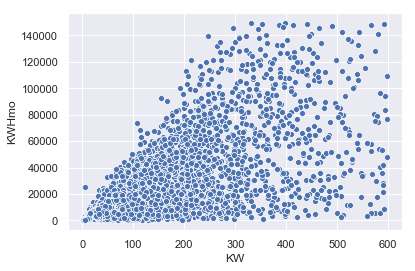

In [59]:
sns.scatterplot(active_model['KW'],active_model['KWHmo'])

In [60]:
#normalize by max
#kwscale2d=minmax.fit_transform(active_model[['KW']].values)
#kwhscale2d=minmax.fit_transform(active_model[['KWH']].values)

kwscale2d=active_model[['KW']]/active_model['KW'].max()
kwhscale2d=active_model[['KWHmo']]/active_model['KWHmo'].max()

df_norm=pd.DataFrame(kwscale2d)
df_norm.rename(columns={0:'KW'},inplace=True)

In [61]:
df_norm.head()

,KW
0,0.038462
1,0.018395
2,0.018395
3,0.043478
4,0.167224


In [62]:
len(kwhscale2d)

36123

In [63]:
df_norm['KW'].size

36123

In [64]:
#kwhscale2d=minmax.fit_transform(custut_model[['KWH']].values)
df_norm['KWHmo']=kwhscale2d
df_norm.rename(columns={0:'KW'},inplace=True)
df_norm.head()

,KW,KWHmo
0,0.038462,0.041438
1,0.018395,0.025552
2,0.018395,0.002502
3,0.043478,0.042729
4,0.167224,0.157926


In [65]:
# Assuming KW and KWH are still in place, add in actively managed information, and customer id info:

df_norm['AM']=active_model['Actively Managed']
df_norm['NAME']=active_model['NAME']
df_norm['ID']=active_model['#CUSTOMER_ID']

In [66]:
df_norm.dropna(inplace=True)

In [67]:
df_norm.head()

,KW,KWHmo,AM,NAME,ID
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535
3,0.043478,0.042729,0.0,FLOW QUIP MINING INDUSTRIAL,13375654
4,0.167224,0.157926,0.0,HAMBLIN #527 INC,26572806


In [68]:
active['KW'].max()

129846

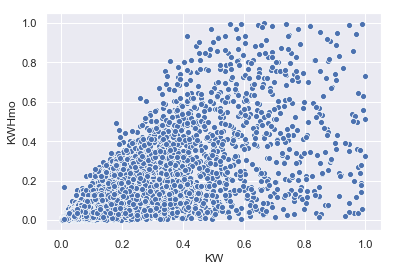

In [69]:
sns.scatterplot(df_norm['KW'],df_norm['KWHmo'])

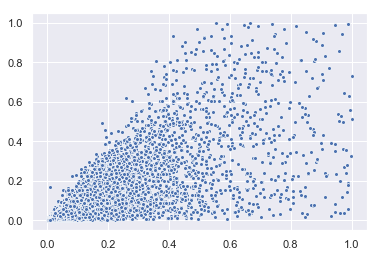

In [70]:
X=np.array(list(zip(df_norm['KW'].values,df_norm['KWHmo'].values)))
sns.scatterplot(df_norm['KW'].values,df_norm['KWHmo'].values,s=15)

In [71]:
X

array([[0.03846154, 0.04143813],
       [0.01839465, 0.02555184],
       [0.01839465, 0.00250167],
       ...,
       [0.01505017, 0.00658863],
       [0.01003344, 0.00317726],
       [0.05351171, 0.03380602]])

## Elbow Method

In [68]:
# create array of distortions which are the sum of the minimum distances divided by the length of the data.
distortion=[]
for k in range(1,10):
    kmodel=KMeans(n_clusters=k).fit(X)
    kmodel.fit(X)
    distortion.append(sum(np.min(cdist(X,kmodel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

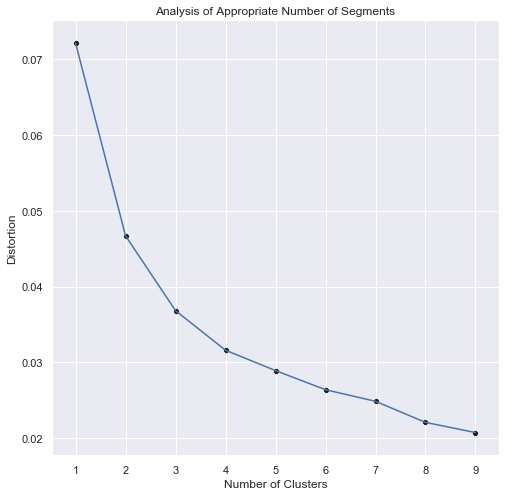

In [69]:
# plot elbow
fig=plt.figure(figsize=(8,8))
sns.lineplot(range(1,10),distortion,color='b')
sns.scatterplot(range(1,10),distortion,color='k')

plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Analysis of Appropriate Number of Segments')
plt.show()

In [70]:
# different method that weights distortions
var_exp=[]
for k in range(1,10):
    kmodel=KMeans(n_clusters=k).fit(X)
    kmodel.fit(X)
    var_exp.append(np.sqrt(kmodel.inertia_/(X.shape[0]-1)))
    #var_exp.append(kmodel.inertia_)

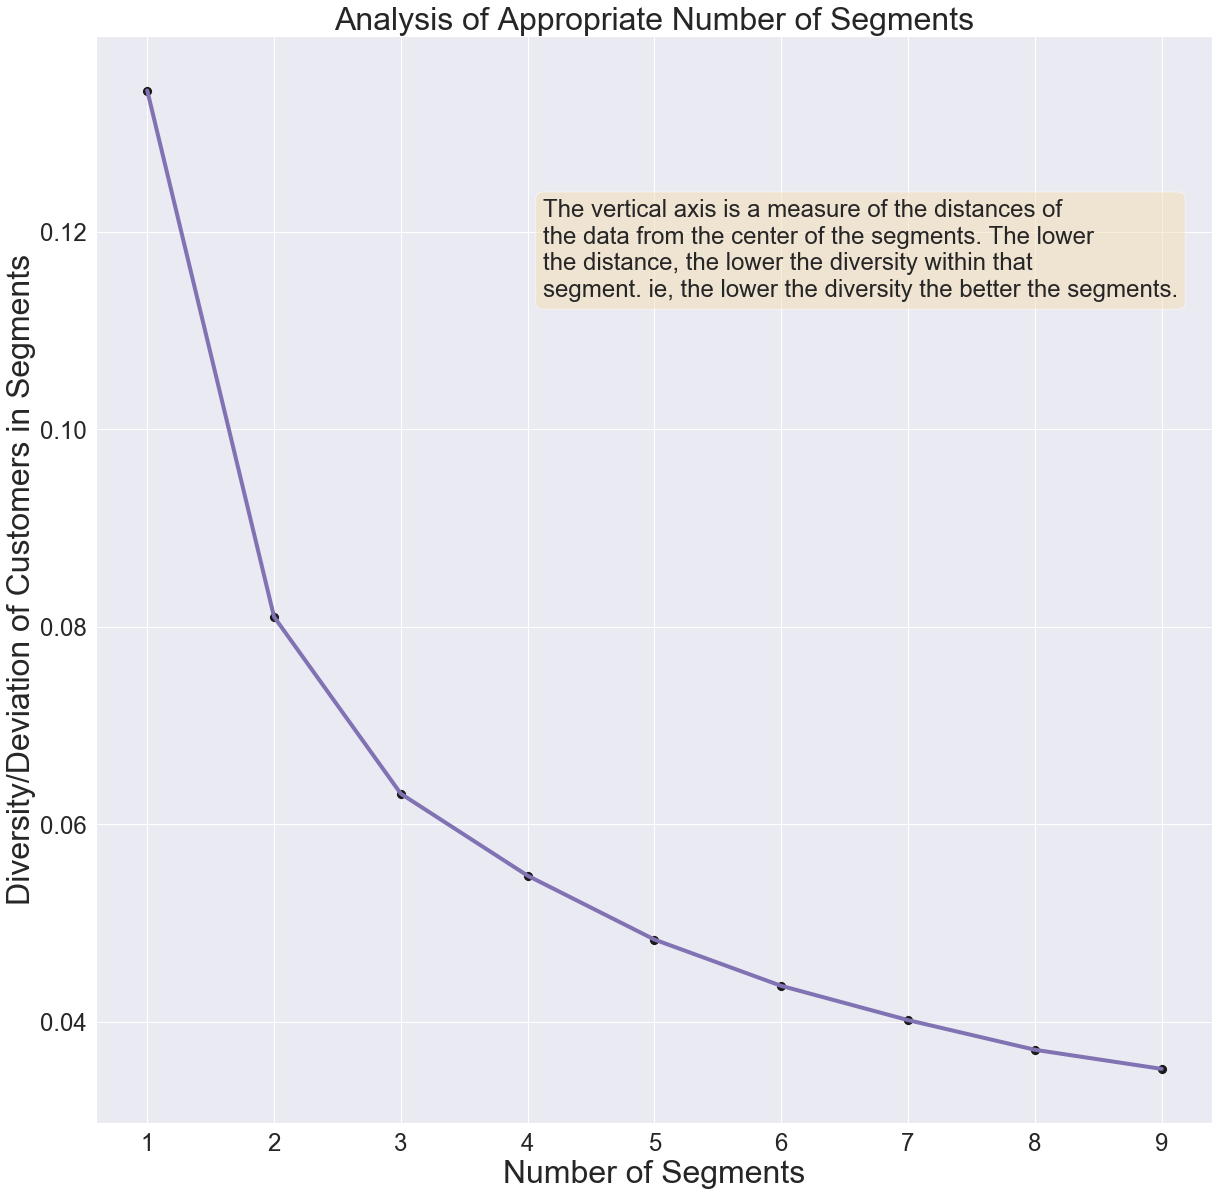

In [71]:
# plot elbow
SMALL_SIZE = 24
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig=plt.figure(figsize=(20,20))
axes=plt.gca()

sns.scatterplot(range(1,10),var_exp,color='k',s=100)
sns.lineplot(range(1,10),var_exp,color='m',linewidth=4)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr='\n'.join(('The vertical axis is a measure of the distances of', 
                   'the data from the center of the segments. The lower',
                   'the distance, the lower the diversity within that',
                   'segment. ie, the lower the diversity the better the segments.'))
# place a text box in upper left in axes coords
axes.text(0.4, 0.85, textstr, transform=axes.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)


plt.xlabel('Number of Segments')
plt.ylabel('Diversity/Deviation of Customers in Segments')
plt.title('Analysis of Appropriate Number of Segments')
plt.show()

In [72]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3).fit(X)

labels=kmeans.predict(X)

centroids=kmeans.cluster_centers_

In [73]:
print(centroids)

[[0.0295569  0.01651985]
 [0.5784645  0.46758183]
 [0.22496388 0.15315767]]


In [74]:
#rearrange centroids
centroids.sort(axis=0)
centroids

array([[0.0295569 , 0.01651985],
       [0.22496388, 0.15315767],
       [0.5784645 , 0.46758183]])

In [75]:
df_norm['Segment']=labels
df_norm.head()

,KW,KWHmo,AM,NAME,ID,Segment
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,0
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,0
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535,0
3,0.043478,0.042729,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,0
4,0.167224,0.157926,0.0,HAMBLIN #527 INC,26572806,2


In [76]:
#un-normalize data and centroids
df_norm['KWreal']=df_norm['KW']*active_model['KW'].max()
df_norm['KWHreal']=df_norm['KWHmo']*active_model['KWHmo'].max()

In [77]:
centroids

array([[0.0295569 , 0.01651985],
       [0.22496388, 0.15315767],
       [0.5784645 , 0.46758183]])

In [78]:
centroids[:,0]*active_model['KW'].max()

array([ 17.67502461, 134.52840112, 345.92177314])

In [79]:
centroids[:,1]*active_model['KWHmo'].max()

array([ 2469.71800394, 22897.07223001, 69903.48370274])

In [80]:
kwcenter=[]
kwhcenter=[]
for m in range(3):
    kwcenter.append(centroids[m,0]*active_model['KW'].max())
    kwhcenter.append(centroids[m,1]*active_model['KWHmo'].max())
#centers=np.vstack((kwcenter,kwhcenter))
#centers
print(kwcenter,kwhcenter)

[17.675024612355124, 134.52840112201946, 345.9217731421122] [2469.718003937995, 22897.07223001404, 69903.48370273798]


In [81]:
xtick=np.arange(0,1,.2);
x=[]
for i in xtick:
    val=np.round(i*active_model['KW'].max(),0)
    x.append(val)

y=[]
for i in xtick:
    val=np.round(i*active_model['KWHmo'].max()/100000,0)
    y.append(val)
print(x,y)
xlabel=list(x)
ylabel=list(y)

[0.0, 120.0, 239.0, 359.0, 478.0] [0.0, 0.0, 1.0, 1.0, 1.0]


In [82]:
df_norm.head(2)

,KW,KWHmo,AM,NAME,ID,Segment,KWreal,KWHreal
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,0,23.0,6195.0
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,3820.0


In [83]:
# segment dataframe
seg1=df_norm.loc[df_norm['Segment']==0]
seg2=df_norm.loc[df_norm['Segment']==1]
seg3=df_norm.loc[df_norm['Segment']==2]
acv=df_norm.loc[df_norm['AM']==1]
acv1=df_norm.loc[df_norm['AM']==2]

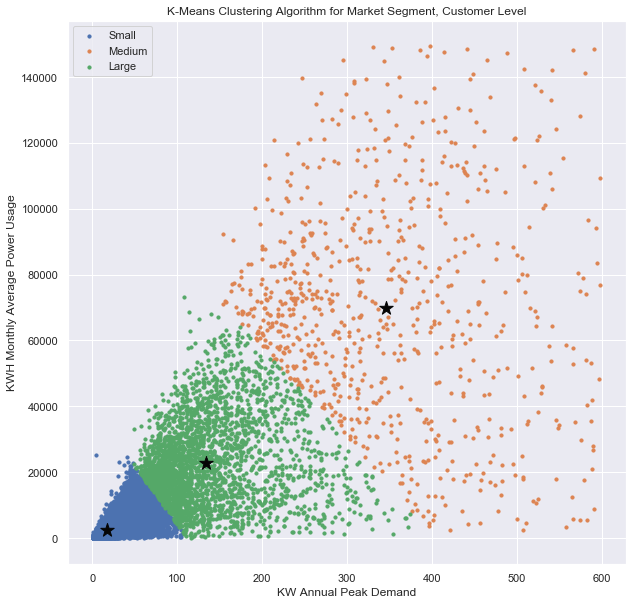

In [96]:
from matplotlib.lines import Line2D
sns.set()
fig=plt.figure(figsize=(10,10))
#7431A3
#286A8B
#AA013
#288B54
#plt.scatter(seg1['KWreal'],seg1['KWHreal'],color='#144A65',s=10)
##plt.fill(seg1['KW'],seg1['KWH'])
#plt.scatter(seg2['KWreal'],seg2['KWHreal'],color='#2583B3',s=10)
#plt.scatter(seg3['KWreal'],seg3['KWHreal'],color='#33B6F9',s=10)

plt.scatter(seg1['KWreal'],seg1['KWHreal'],s=10)
#plt.fill(seg1['KW'],seg1['KWH'])
plt.scatter(seg2['KWreal'],seg2['KWHreal'],s=10)
plt.scatter(seg3['KWreal'],seg3['KWHreal'],s=10)
#plt.scatter(acv['KW'],acv['KWH'],color='#EB2612',s=10)
#plt.scatter(acv1['KW'],acv1['KWH'],color='#0BDD00',s=10)
#plt.scatter(kwcenter, kwhcenter, marker='*', c='#050505', s=200)
plt.scatter(centroids[:,0]*active_model['KW'].max(), centroids[:,1]*active_model['KWHmo'].max(), marker='*', c='#050505', s=200)
#plt.plot(centroids[:, 0], centroids[:, 1],c='#050505')

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Monthly Average Power Usage')
#plt.xticks(np.arange(0,1,.2),xlabel)
#plt.yticks(np.arange(0,300000,300000/5),df_norm['KWHreal'])
plt.title('K-Means Clustering Algorithm for Market Segment, Customer Level')

'''custom_lines = [Line2D([0], [0], color='#144A65', lw=4),
                Line2D([0], [0], color='#2583B3', lw=4),
                Line2D([0], [0], color='#33B6F9', lw=4),
                #Line2D([0], [0], color='#EB2612', lw=4),
                #Line2D([0], [0], color='#0BDD00', lw=4),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None')]
plt.legend(custom_lines,['Small Customer Segment','Medium Customer Segment','Large Customer Segment','Centroid'])'''
plt.legend(['Small','Medium','Large'])
plt.show()

In [85]:
seg3['KWHreal'].max()

73300.0

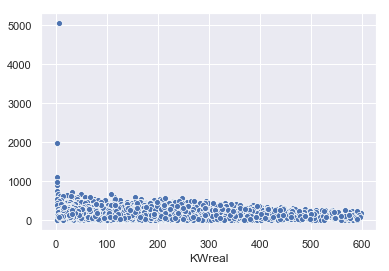

In [86]:
sns.scatterplot(df_norm['KWreal'],df_norm['KWHreal']/df_norm['KWreal'])

(0, 1500)

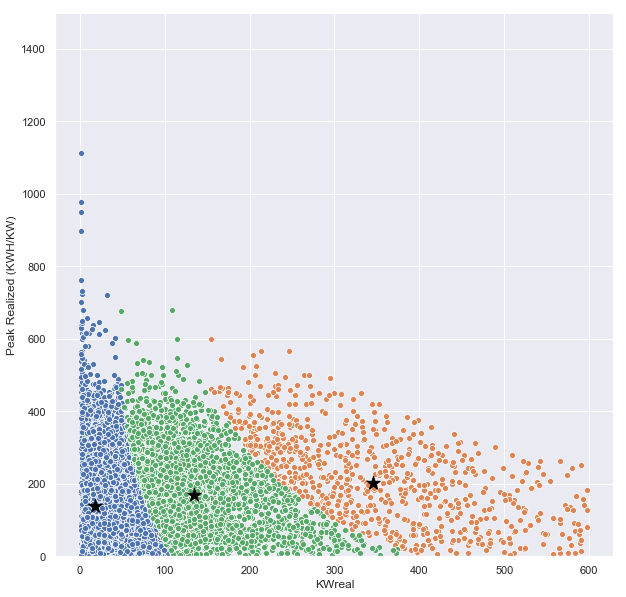

In [87]:
fig=plt.figure(figsize=(10,10))

sns.scatterplot(seg1['KWreal'],seg1['KWHreal']/seg1['KWreal'])
sns.scatterplot(seg2['KWreal'],seg2['KWHreal']/seg2['KWreal'])
sns.scatterplot(seg3['KWreal'],seg3['KWHreal']/(seg3['KWreal']))
plt.scatter(centroids[:,0]*active_model['KW'].max(), (centroids[:,1]*active_model['KWHmo'].max())/(centroids[:,0]*active_model['KW'].max()), marker='*', c='#050505', s=200)
plt.ylabel("Peak Realized (KWH/KW)")
plt.ylim(0,1500)

## Area Segmentation

In [88]:
df_norm.columns

Index(['KW', 'KWHmo', 'AM', 'NAME', 'ID', 'Segment', 'KWreal', 'KWHreal'], dtype='object')

In [95]:
df_norm['area']=df_norm['KW']*df_norm['KWHmo']
df_norm.head(3)

,KW,KWHmo,AM,NAME,ID,Segment,KWreal,KWHreal,area
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,0,23.0,6195.0,0.001594
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,3820.0,0.000470
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535,0,11.0,374.0,0.000046


In [96]:
Xarea=np.array(list(zip(df_norm['area'].values)))
Xarea

array([[1.59377412e-03],
       [4.70017114e-04],
       [4.60173824e-05],
       ...,
       [9.91599647e-05],
       [3.18788380e-05],
       [1.80901780e-03]])

In [98]:
from sklearn.cluster import KMeans

kmeans_area=KMeans(n_clusters=3).fit(Xarea)

labels_area=kmeans_area.predict(Xarea)

centroids_area=kmeans_area.cluster_centers_

In [99]:
print(centroids_area)

[[0.00298085]
 [0.47515526]
 [0.15655474]]


In [100]:
#rearrange centroids
centroids_area.sort(axis=0)
centroids_area

array([[0.00298085],
       [0.15655474],
       [0.47515526]])

In [114]:
df_area=pd.DataFrame()
df_area['KW']=df_norm['KWreal']
df_area['KWH']=df_norm['KWHreal']
df_area['area']=df_norm['area']
df_area['Segment']=labels
df_area['group']=labels_area
df_area.head()

,KW,KWH,area,Segment,group
0,23.0,6195.0,0.001594,0,0
1,11.0,3820.0,0.000470,0,0
2,11.0,374.0,0.000046,0,0
3,26.0,6388.0,0.001858,0,0
4,100.0,23610.0,0.026409,2,0


In [115]:
#un-normalize data and centroids
df_area['KWKWH']=df_area['area']*active_model['KW'].max()*active_model['KWH'].max()


In [116]:
centroids_area

array([[0.00298085],
       [0.15655474],
       [0.47515526]])

In [117]:
centroids_area[:,0]*active_model['KW'].max()*active_model['KWH'].max()

array([6.43780313e+07, 3.38114490e+09, 1.02620261e+10])

In [77]:
kwcenter=[]
kwhcenter=[]
for m in range(3):
    kwcenter.append(centroids[m,0]*active_model['KW'].max())
    kwhcenter.append(centroids[m,1]*active_model['KWHmo'].max())
#centers=np.vstack((kwcenter,kwhcenter))
#centers
print(kwcenter,kwhcenter)

[17.643365038322735, 134.0830425680389, 345.5116883116884] [2464.7760027087925, 22807.473133286818, 69811.3506493507]


In [118]:
# segment dataframe
sega1=df_area.loc[df_area['Segment']==0]
sega2=df_area.loc[df_area['Segment']==1]
sega3=df_area.loc[df_area['Segment']==2]

sega1a=df_area.loc[df_area['group']==0]
sega2a=df_area.loc[df_area['group']==1]
sega3a=df_area.loc[df_area['group']==2]


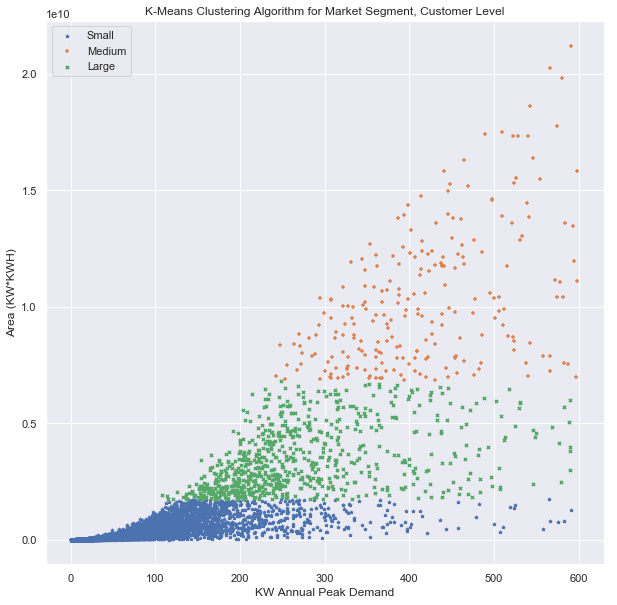

In [123]:
from matplotlib.lines import Line2D
sns.set()
fig=plt.figure(figsize=(10,10))
#7431A3
#286A8B
#AA013
#288B54
#plt.scatter(seg1['KWreal'],seg1['KWHreal'],color='#144A65',s=10)
##plt.fill(seg1['KW'],seg1['KWH'])
#plt.scatter(seg2['KWreal'],seg2['KWHreal'],color='#2583B3',s=10)
#plt.scatter(seg3['KWreal'],seg3['KWHreal'],color='#33B6F9',s=10)

#plt.scatter(sega1['KW'],sega1['KWKWH'],s=10)
#plt.scatter(sega2['KW'],sega2['KWKWH'],s=10)
#plt.scatter(sega3['KW'],sega3['KWKWH'],s=10)

plt.scatter(sega1a['KW'],sega1a['KWKWH'],s=10,marker='*')
plt.scatter(sega2a['KW'],sega2a['KWKWH'],s=10,marker='+')
plt.scatter(sega3a['KW'],sega3a['KWKWH'],s=10,marker='x')

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('Area (KW*KWH)')
#plt.xticks(np.arange(0,1,.2),xlabel)
#plt.yticks(np.arange(0,300000,300000/5),df_norm['KWHreal'])
plt.title('K-Means Clustering Algorithm for Market Segment, Customer Level')

'''custom_lines = [Line2D([0], [0], color='#144A65', lw=4),
                Line2D([0], [0], color='#2583B3', lw=4),
                Line2D([0], [0], color='#33B6F9', lw=4),
                #Line2D([0], [0], color='#EB2612', lw=4),
                #Line2D([0], [0], color='#0BDD00', lw=4),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None')]
plt.legend(custom_lines,['Small Customer Segment','Medium Customer Segment','Large Customer Segment','Centroid'])'''
plt.legend(['Small','Medium','Large'])
plt.show()

## Voronoi Diagram

In [159]:
from scipy.spatial import Voronoi

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

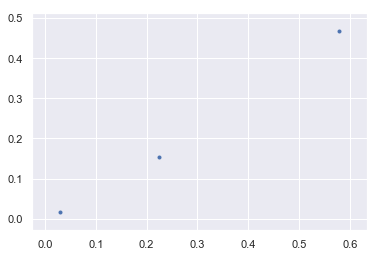

In [160]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = centroids

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
voronoi_plot_2d(vor)

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

plt.show()

In [161]:
np.array(centroids)

array([[0.0295694 , 0.01652123],
       [0.22507833, 0.15335321],
       [0.57873503, 0.4677416 ]])

In [162]:
points.shape

(3, 2)

--
[[1, 0, 2], [4, 3, 0], [0, 5, 6]]
--
[[-1.63132168  2.59773373]
 [-0.98658155  1.67651299]
 [-2.34515359  3.46651532]
 [-0.88425695  1.75735777]
 [-0.98658155  1.67651299]
 [-0.88425695  1.75735777]
 [-2.34515359  3.46651532]]


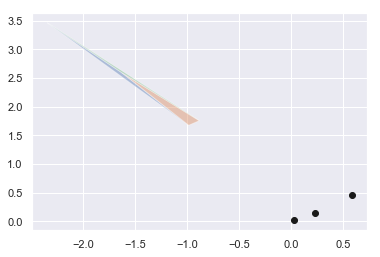

In [163]:
points = np.random.rand(3,2)
vor=Voronoi(np.array(centroids))

regions, vertices = voronoi_finite_polygons_2d(vor)
print("--")
print(regions)
print("--")
print(vertices)

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(centroids[:,0], centroids[:,1], 'ko')
#plt.axis('equal')
#plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
#plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
#plt.xlim(0,1500)
plt.show()

## Segment Information

In [164]:
custut_model['KWH'].max()

NameError: name 'custut_model' is not defined

In [165]:
df_norm['KWreal']=df_norm['KW']*active_model['KW'].max()
df_norm['KWHreal']=df_norm['KWHmo']*active_model['KWHmo'].max()

In [166]:
df_norm.head()

,KW,KWHmo,AM,NAME,ID,Segment,KWreal,KWHreal
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,0,23.0,6195.0
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,3820.0
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535,0,11.0,374.0
3,0.043478,0.042729,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,0,26.0,6388.0
4,0.167224,0.157926,0.0,HAMBLIN #527 INC,26572806,1,100.0,23610.0


In [167]:
df_norm.drop(columns=['KW','KWHmo'],inplace=True)

In [168]:
df_norm.head()

,AM,NAME,ID,Segment,KWreal,KWHreal
0,0.0,ANGEL CAFE,64098894,0,23.0,6195.0
1,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,3820.0
2,0.0,FINLAYSON ENGINEERING INC,10006535,0,11.0,374.0
3,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,0,26.0,6388.0
4,0.0,HAMBLIN #527 INC,26572806,1,100.0,23610.0


In [169]:
# segment dataframe
seg1=df_norm.loc[df_norm['Segment']==0]
seg2=df_norm.loc[df_norm['Segment']==1]
seg3=df_norm.loc[df_norm['Segment']==2]
acv=df_norm.loc[df_norm['AM']==1]
acv1=df_norm.loc[df_norm['AM']==2]

In [170]:
seg1.sort_values(by='KWHreal',ascending=False).head(5)

,AM,NAME,ID,Segment,KWreal,KWHreal
19046,0.0,IMMORTAL INK,59070332,0,5.0,25348.0
9069,0.0,COMPUTER SERVICE LLC,70141476,0,41.0,24665.0
38399,0.0,"SKY VENTURES, INC",9628738,0,42.0,23093.0
8193,0.0,CITADEL ASSOC LTD PTNRSHP,26559786,0,32.0,23080.0
45105,0.0,VIASAT INC,17381823,0,48.0,22690.0


In [171]:
# define points to calculate segmentation line functions
points_kw1=[]
points_kwh1=[]
points_kw2=[]
points_kwh2=[]
points_kw1.append(seg1.loc[seg1['KWreal'].idxmax()]['KWreal'])
points_kwh1.append(seg1.loc[seg1['KWreal'].idxmax()]['KWHreal'])
points_kw1.append(seg1.loc[seg1['KWHreal'].idxmax()]['KWreal'])
points_kwh1.append(seg1.loc[seg1['KWHreal'].idxmax()]['KWHreal'])


points_kw2.append(seg3.loc[seg3['KWreal'].idxmax()]['KWreal'])
points_kwh2.append(seg3.loc[seg3['KWreal'].idxmax()]['KWHreal'])
points_kw2.append(seg3.loc[seg3['KWHreal'].idxmax()]['KWreal'])
points_kwh2.append(seg3.loc[seg3['KWHreal'].idxmax()]['KWHreal'])

# calculate slopes of lines assuming KW is independent variable
slope1=(points_kwh1[1]-points_kwh1[0])/(points_kw1[1]-points_kw1[0])
slope2=(points_kwh2[1]-points_kwh2[0])/(points_kw2[1]-points_kw2[0])


In [172]:
slope2

-362.73

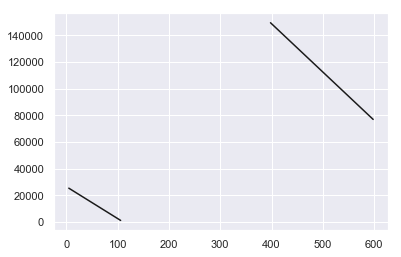

In [173]:
plt.plot(points_kw1,points_kwh1,color='k')
plt.plot(points_kw2,points_kwh2,color='k')

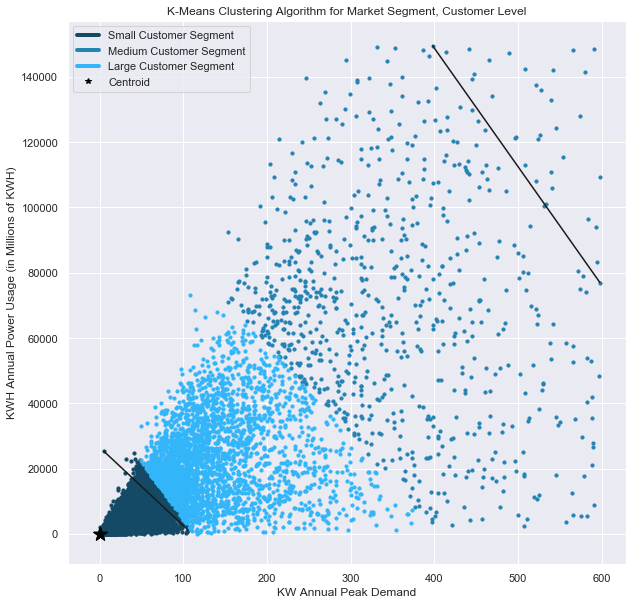

In [174]:
from matplotlib.lines import Line2D
sns.set()
fig=plt.figure(figsize=(10,10))
#7431A3
#286A8B
#AA013
#288B54
plt.scatter(seg1['KWreal'],seg1['KWHreal'],color='#144A65',s=10)
plt.scatter(seg3['KWreal'],seg3['KWHreal'],color='#2583B3',s=10)
plt.scatter(seg2['KWreal'],seg2['KWHreal'],color='#33B6F9',s=10)
plt.plot(points_kw1,points_kwh1,color='k')
plt.plot(points_kw2,points_kwh2,color='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#050505', s=200)
plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Annual Power Usage (in Millions of KWH)')
#plt.xticks(np.arange(0,1,.2),xlabel)
#plt.yticks(np.arange(0,1,.2),ylabel)
plt.title('K-Means Clustering Algorithm for Market Segment, Customer Level')

custom_lines = [Line2D([0], [0], color='#144A65', lw=4),
                Line2D([0], [0], color='#2583B3', lw=4),
                Line2D([0], [0], color='#33B6F9', lw=4),
                #Line2D([0], [0], color='#EB2612', lw=4),
                #Line2D([0], [0], color='#0BDD00', lw=4),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None')]
plt.legend(custom_lines,['Small Customer Segment','Medium Customer Segment','Large Customer Segment','Centroid'])
plt.show()

In [175]:
print(points_kw1,
points_kwh1,
points_kw2,
points_kwh2)

[106.0, 5.0] [1147.0, 25348.0] [598.0, 398.0] [76954.0, 149500.0]


In [176]:
""" define functions for boundary lines
y=mx+b
"""

# find intercepts
b1=points_kwh1[1]-(slope1*points_kw1[1])
b2=points_kwh2[1]-(slope2*points_kw2[1])
print(b1,b2)

26546.069306930694 293866.54000000004


In [177]:
# cross validation
b1a=points_kwh1[0]-(slope1*points_kw1[0])
b2a=points_kwh2[0]-(slope2*points_kw2[0])
print("The slope for segment 1 is:",100*b1a/b1,"%",
     "The slope for segment 2 is:",100*b2a/b2,"%")

The slope for segment 1 is: 99.99999999999999 % The slope for segment 2 is: 100.0 %


In [178]:
print("m1=",slope1,"b1=",b1,
     "m2=",slope2,"b2=",b2)

m1= -239.6138613861386 b1= 26546.069306930694 m2= -362.73 b2= 293866.54000000004


In [179]:
df_norm['ratio']=df_norm['KWH']/df_norm['KW']
df_norm.head()

KeyError: 'KWH'

In [180]:
sns.scatterplot(df_norm['KW'],df_norm['ratio'])

KeyError: 'KW'

In [162]:
df_norm.head(5)

,KW,KWHmo,AM,NAME,ID,Segment,KWreal,KWHreal
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,1,23.0,6195.0
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,1,11.0,3820.0
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535,1,11.0,374.0
3,0.043478,0.042729,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,1,26.0,6388.0
4,0.167224,0.157926,0.0,HAMBLIN #527 INC,26572806,0,100.0,23610.0


### Linear Prediction for Boundary

In [181]:
# determine which segment is which
print(seg1.KWreal.max(),
seg2.KWreal.max(),
seg3.KWreal.max())

106.0 374.0 598.0


In [182]:
seg2.loc[seg2['KWHreal'].idxmax()]['KWHreal']

73300.0

In [183]:
# segment dataframe
seg1=df_norm.loc[df_norm['Segment']==0]
seg2=df_norm.loc[df_norm['Segment']==1]
seg3=df_norm.loc[df_norm['Segment']==2]

# separate KW into small bins for segment 1
seg1=seg1.loc[seg1['KWHreal']<seg1.loc[seg1['KWHreal'].idxmax()]['KWHreal']]
seg1bin=pd.DataFrame()
bins1=pd.cut(seg1['KWreal'],30,include_lowest=True)
seg1bin['bins']=bins1
seg1=seg1.join(seg1bin)
seg1['group']=seg1['bins'].astype('str')

# remove weird outlier from segment then bin the same as above
#seg2=seg2.loc[seg2['KWHreal']<seg2.loc[seg2['KWHreal'].idxmax()]['KWHreal']]
seg2bin=pd.DataFrame()
bins2=pd.cut(seg2['KWreal'],20,include_lowest=True)
seg2bin['bins']=bins2
seg2=seg2.join(seg2bin)
seg2['group']=seg2['bins'].astype('str')

# search through the bins of KW to find the maximum KWH in that particular bin. If it is larger than the threshold, include it
kwmax1=[]
kwhmax1=[]
for item in seg1['group'].unique():
     if seg1.loc[seg1['group']==item].loc[seg1.loc[seg1['group']==item]['KWreal'].idxmax()]['KWreal']>seg1.loc[seg1['KWHreal'].idxmax()]['KWreal']:
        kwmax1.append(seg1.loc[seg1['group']==item].loc[seg1.loc[seg1['group']==item]['KWreal'].idxmax()]['KWreal'])
        kwhmax1.append(seg1.loc[seg1['group']==item].loc[seg1.loc[seg1['group']==item]['KWHreal'].idxmax()]['KWHreal'])
# Same for the next segment transition
kwmax2=[]
kwhmax2=[]
for item in seg2['group'].unique():
     if seg2.loc[seg2['group']==item].loc[seg2.loc[seg2['group']==item]['KWreal'].idxmax()]['KWreal']>seg2.loc[seg2['KWHreal'].idxmax()]['KWreal']:
        kwmax2.append(seg2.loc[seg2['group']==item].loc[seg2.loc[seg2['group']==item]['KWreal'].idxmax()]['KWreal'])
        kwhmax2.append(seg2.loc[seg2['group']==item].loc[seg2.loc[seg2['group']==item]['KWHreal'].idxmax()]['KWHreal'])

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


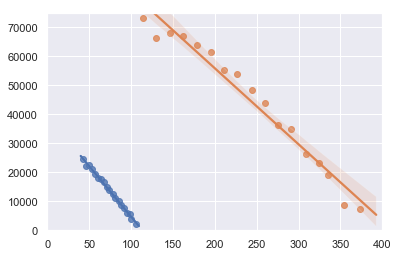

In [184]:
sns.regplot(kwmax1,kwhmax1)
sns.regplot(kwmax2,kwhmax2)
plt.xlim(0,400)
plt.ylim(0,75000)
plt.show()

In [185]:
# Find linear regression model for one of the seg
X = kwmax1
y = kwhmax1

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
slp1=model.params[1]
int1=model.params[0]
print(slp1,int1,
model.summary())

-347.9310851562142 39472.257841321356                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           1.63e-20
Time:                        09:22:12   Log-Likelihood:                -145.10
No. Observations:                  19   AIC:                             294.2
Df Residuals:                      17   BIC:                             296.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [187]:
# Find linear regression model for one of the segments
X = kwmax2
y = kwhmax2

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
slp2=model.params[1]
int2=model.params[0]
print(slp2,int2,
model.summary())

-262.0902961616664 108294.47669058858                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     440.4
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           1.57e-12
Time:                        09:23:22   Log-Likelihood:                -164.32
No. Observations:                  17   AIC:                             332.6
Df Residuals:                      15   BIC:                             334.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [188]:
# There isn't a basic line function for slope-intercept in matplotlib...smh
def line(slope,intercept):
    axes=plt.gca()
    x_val=np.array(axes.get_xlim()) #setup an array of values spanning the xaxis
    y_val=slope*x_val+intercept

In [189]:
print(int2,slp2)

108294.47669058858 -262.0902961616664


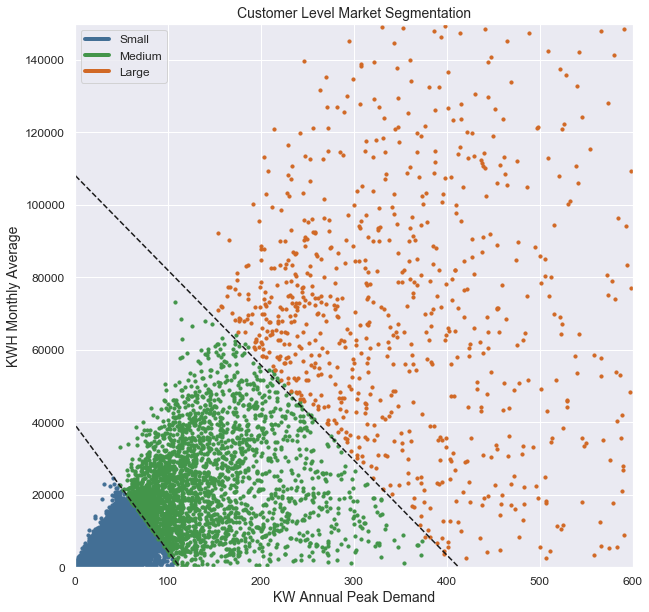

In [190]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#from matplotlib.lines import Line2D
#sns.set()
fig=plt.figure(figsize=(10,10))
axes=plt.gca()

plt.scatter(seg1['KWreal'],seg1['KWHreal'],s=10,color='#436F95')
plt.scatter(seg2['KWreal'],seg2['KWHreal'],s=10,color='#43954A')
plt.scatter(seg3['KWreal'],seg3['KWHreal'],s=10,color='#D16926')

x_values=np.array(axes.get_xlim())
plt.plot(x_values,slp1*x_values+int1,'--',color='k')
plt.plot(x_values,slp2*x_values+int2,'--',color='k')

#plt.scatter(centroids[:,0]*active_model['KW'].max(), centroids[:,1]*active_model['KWHmo'].max(), marker='*', c='#050505', s=200)

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Monthly Average')
plt.title('Customer Level Market Segmentation')
custom_lines = [Line2D([0], [0], color='#436F95', lw=4),
                Line2D([0], [0], color='#43954A', lw=4),
                Line2D([0], [0], color='#D16926', lw=4),
                #Line2D([0], [0], color='#000000',marker='*',linestyle='None'),
                Line2D([0], [0], color='#EB2612', lw=4)]
plt.legend(custom_lines,['Small','Medium','Large'])
plt.xlim(0,600)
plt.ylim(0,150000)
plt.show()

In [191]:
int1/-slp1

113.44849461668277

In [192]:
def integrand(x,a,b):
    return a*x+b

In [193]:
# determine areas under curve
import scipy.integrate as integrate


a=slp1
b=int1
#integrate from 0 to x-int
area1=integrate.quad(integrand,0,int1/-slp1,args=(a,b))

a=slp2
b=int2
#Since I just want the total area, integrate from 0 to x-int of second line
area2=integrate.quad(integrand,0,int2/-slp2,(a,b))

seg1_cutoff=np.round(area1[0],0)
seg2_cutoff=np.round(area2[0],0)

print(seg1_cutoff,seg2_cutoff)

2239034.0 22373384.0


In [194]:
# analytical solution by hand

seg1_cutoff_an=2227580.256
seg2_cutoff_an=22395014.92

In [100]:
df_area['segment 2']=seg2['KW']*seg2['KWHreal']

NameError: name 'df_area' is not defined

In [101]:
df_area=pd.DataFrame()
df_area['segment 1']=seg1['KWreal']*seg1['KWHreal']
df_area['segment 2']=seg2['KWreal']*seg2['KWHreal']
#df_area['segment 2'].dropna(inplace=True)

In [102]:
# problem is, the data isn't normalized so they're going to overlap (scale of x is much smaller)
min1=np.amin(area_1)
max1=np.amax(area_1)
min2=np.amin(area_2)
max2=np.amax(area_2)
print(min1,max1,min2,max2)

NameError: name 'area_1' is not defined

In [103]:
df_area['segment 2']=df_area['segment 2'].dropna()

In [104]:
df_area['segment 2'].dtype

dtype('float64')

In [105]:
np.amax(area_1)

NameError: name 'area_1' is not defined

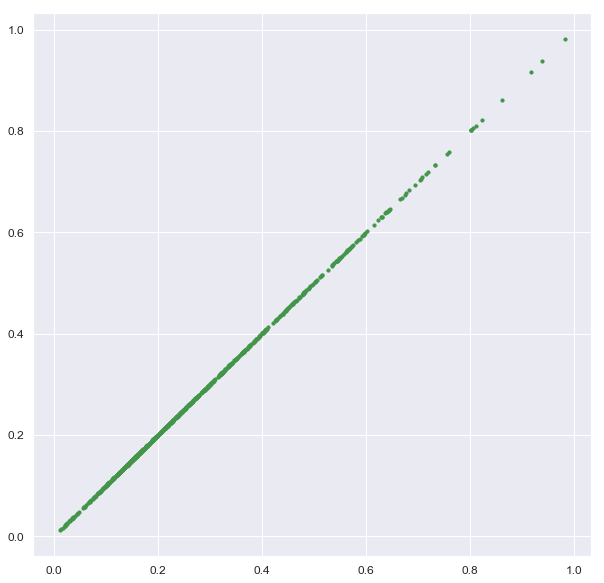

In [106]:
# plot data with cutoff

area_1=seg1['KW']*seg1['KWHmo']
area_2=seg2['KW']*seg2['KWHmo']

fig=plt.figure(figsize=(10,10))
axes=plt.gca()

#plt.scatter(area_1,area_1,s=10,color='#436F95')
plt.scatter(area_2,area_2,s=10,color='#43954A')
#sns.distplot(area_1)
#sns.distplot(area_2)

In [107]:
SMALL_SIZE = 24
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

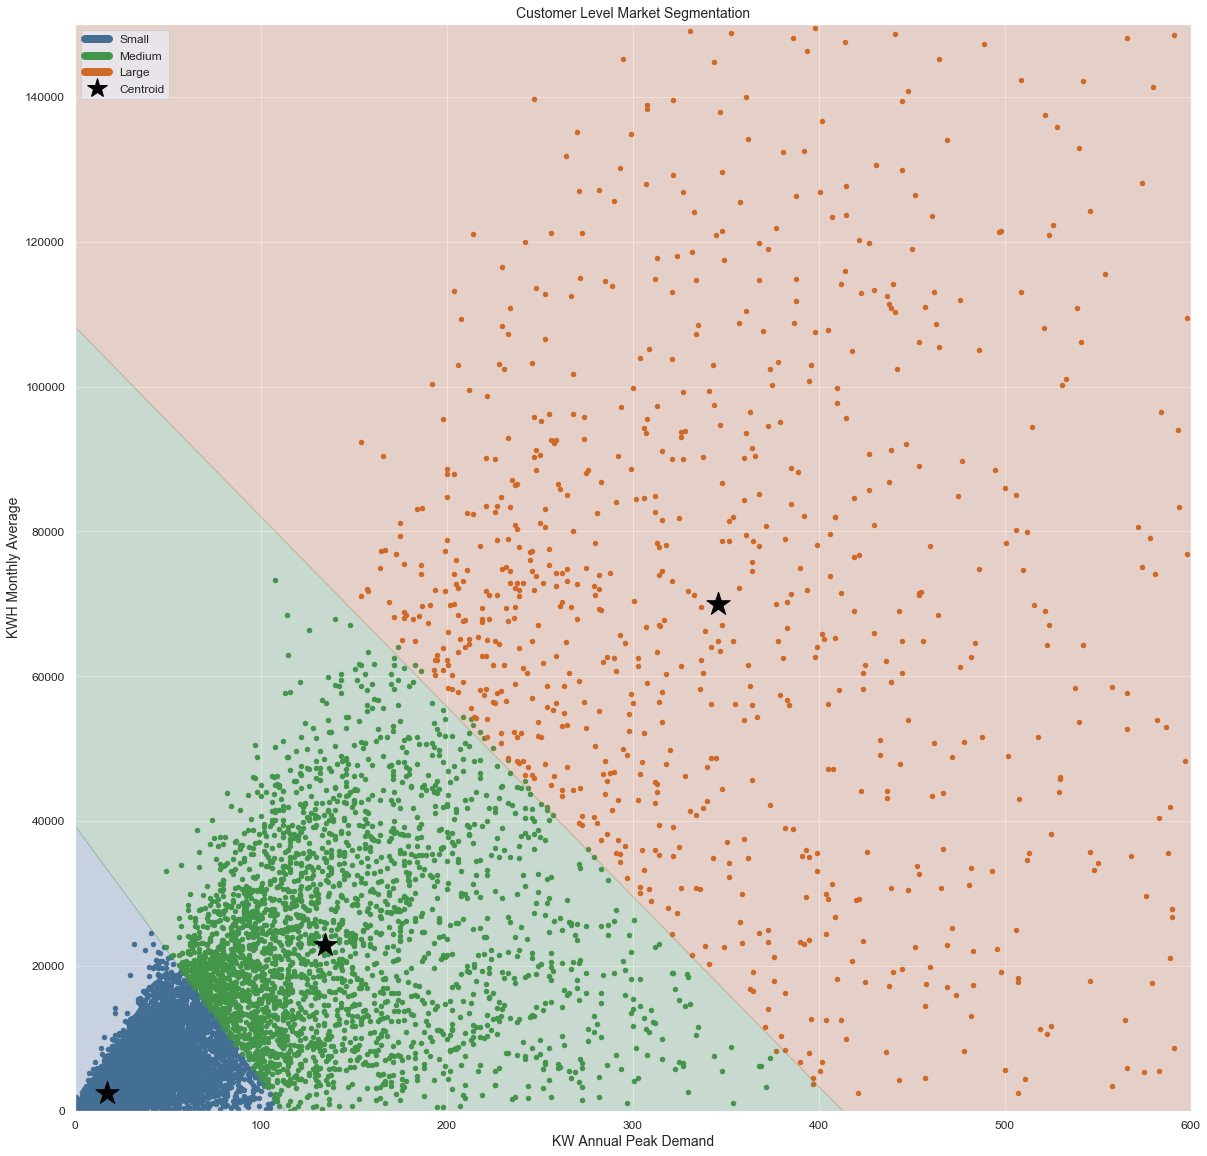

In [195]:
# The purpose of this plot is for the steering committee, so verbage is simplified

#from matplotlib.lines import Line2D
#sns.set()
fig=plt.figure(figsize=(20,20))
axes=plt.gca()

plt.scatter(seg1['KWreal'],seg1['KWHreal'],s=20,color='#436F95')
plt.scatter(seg2['KWreal'],seg2['KWHreal'],s=20,color='#43954A')
plt.scatter(seg3['KWreal'],seg3['KWHreal'],s=20,color='#D16926')

x_values=np.array(axes.get_xlim())
#plt.plot(x_values,slp1*x_values+int1,'--',color='k',linewidth=4)
#plt.plot(x_values,slp2*x_values+int2,'--',color='k',linewidth=4)

plt.fill_between(x_values,slp1*x_values+int1,alpha=0.2,color='#436F95')
plt.fill_between(x_values,slp2*x_values+int2,y2=slp1*x_values+int1,alpha=0.2,color='#43954A')
plt.fill_between(x_values,150000,y2=slp2*x_values+int2,alpha=0.2,color='#D16926')

plt.scatter(centroids[:,0]*active_model['KW'].max(), centroids[:,1]*active_model['KWHmo'].max(), marker='*', c='#050505', s=600)

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Monthly Average')
plt.title('Customer Level Market Segmentation')
custom_lines = [Line2D([0], [0], color='#436F95', lw=8),
                Line2D([0], [0], color='#43954A', lw=8),
                Line2D([0], [0], color='#D16926', lw=8),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None',markersize=20),
                Line2D([0], [0], color='#EB2612', lw=8)]
plt.legend(custom_lines,['Small','Medium','Large','Centroid'])
plt.xlim(0,600)
plt.ylim(0,150000)
plt.show()

#### One-Dimensional Describer

In [196]:
print(seg1['KWreal'].max(),seg2['KWreal'].max())

106.0 374.0


In [197]:
print(seg1['KWHreal'].max(),seg2['KWHreal'].max())

24664.999999999996 73300.0


C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


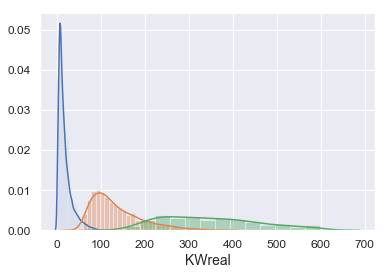

In [198]:
sns.distplot(seg1['KWreal'])
sns.distplot(seg2['KWreal'])
sns.distplot(seg3['KWreal'])

In [199]:
print(seg1['KWreal'].median(),
seg2['KWreal'].median(),
seg3['KWreal'].median())

13.0 119.0 333.0


C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-10000, 186382.02073186947)

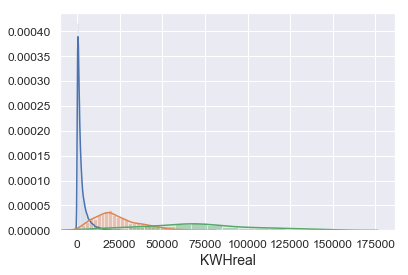

In [200]:
sns.distplot(seg1['KWHreal'])
sns.distplot(seg2['KWHreal'])
sns.distplot(seg3['KWHreal'])
plt.xlim(-10000,)

In [201]:
print(seg1['KWHreal'].median(),
seg2['KWHreal'].median(),
seg3['KWHreal'].median())

1385.5 20525.0 68472.0


C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


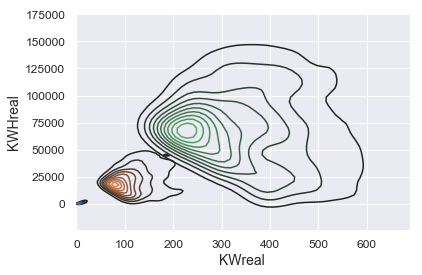

In [202]:
sns.kdeplot(seg1['KWreal'],seg1['KWHreal'],gridsize=50)
sns.kdeplot(seg2['KWreal'],seg2['KWHreal'],gridsize=50)
sns.kdeplot(seg3['KWreal'],seg3['KWHreal'],gridsize=50)

In [116]:
plt.scatter(seg1['KWreal'],seg1['ratio'])
plt.scatter(seg2['KWreal'],seg2['ratio'])
plt.scatter(seg3['KWreal'],seg3['ratio'])


KeyError: 'ratio'

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


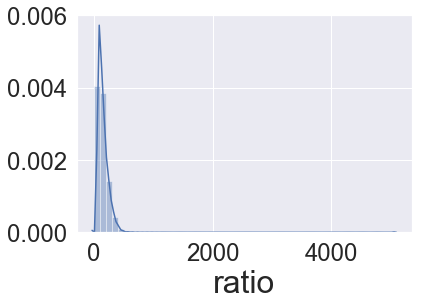

In [113]:
df_norm['ratio']=df_norm['KWHreal']/df_norm['KWreal']
sns.distplot(df_norm['ratio'])

Could attempt to describe cutoff in one dimension using a linear regression, on the most probable path, what are the KW demand cutoffs, and the KWH cutoffs?

In [203]:
# linear regression by method of ordinary least squares via statsmodel library
# notice xdata can take multiple arguments to become a multiple linear regression in the form 'x1','x2'
def lin_reg(xdata,ydata,dataframe):
    X = dataframe[xdata]
    y= dataframe[ydata]
    
    X=sm.add_constant(X)
    model=sm.OLS(y,X).fit()
    #yhat=model.predict(X)
    
    print(model.summary())

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


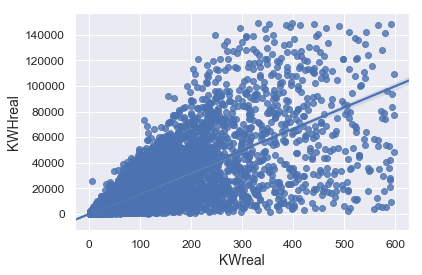

In [204]:
sns.regplot(df_norm['KWreal'],df_norm['KWHreal'])

In [205]:
lin_reg('KWreal','KWHreal',df_norm)

                            OLS Regression Results                            
Dep. Variable:                KWHreal   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 6.627e+04
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:24:51   Log-Likelihood:            -3.7408e+05
No. Observations:               36123   AIC:                         7.482e+05
Df Residuals:                   36121   BIC:                         7.482e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.9247     45.636     -2.803      0.0

\begin{equation}
\hat{KWH}=166.5829(KW)-127.9247
\end{equation}

In [208]:
# find where this model user lies on the segmentation
def y1(x):
    return slp1*x+int1
def y2(x):
    return slp2*x+int2
def y3(x):
    return 166.5829*x-127.9247

In [209]:
# determine KW peak values at the segment shift
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')

seg1_cut=solve(y1(x)-y3(x), x)
seg2_cut=solve(y2(x)-y3(x), x)

print(seg1_cut,seg2_cut)

[76.9661927251563] [252.925544124059]


In [214]:
seg_cutx=[seg1_cut,seg2_cut]
seg_cuty=[seg1_cuty,seg2_cuty]

In [210]:
def x1(y):
    return (int1-y)/(-slp1)
def x2(y):
    return (int2-y)/(-slp2)
def x3(y):
    return (127.9247+y)/(166.5829)

In [211]:
y = Symbol('y')

seg1_cuty=solve(x1(y)-x3(y), y)
seg2_cuty=solve(x2(y)-x3(y), y)

print(seg1_cuty,seg2_cuty)

[12693.3268861154] [42005.1459242636]


In [212]:
SMALL_SIZE = 24
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

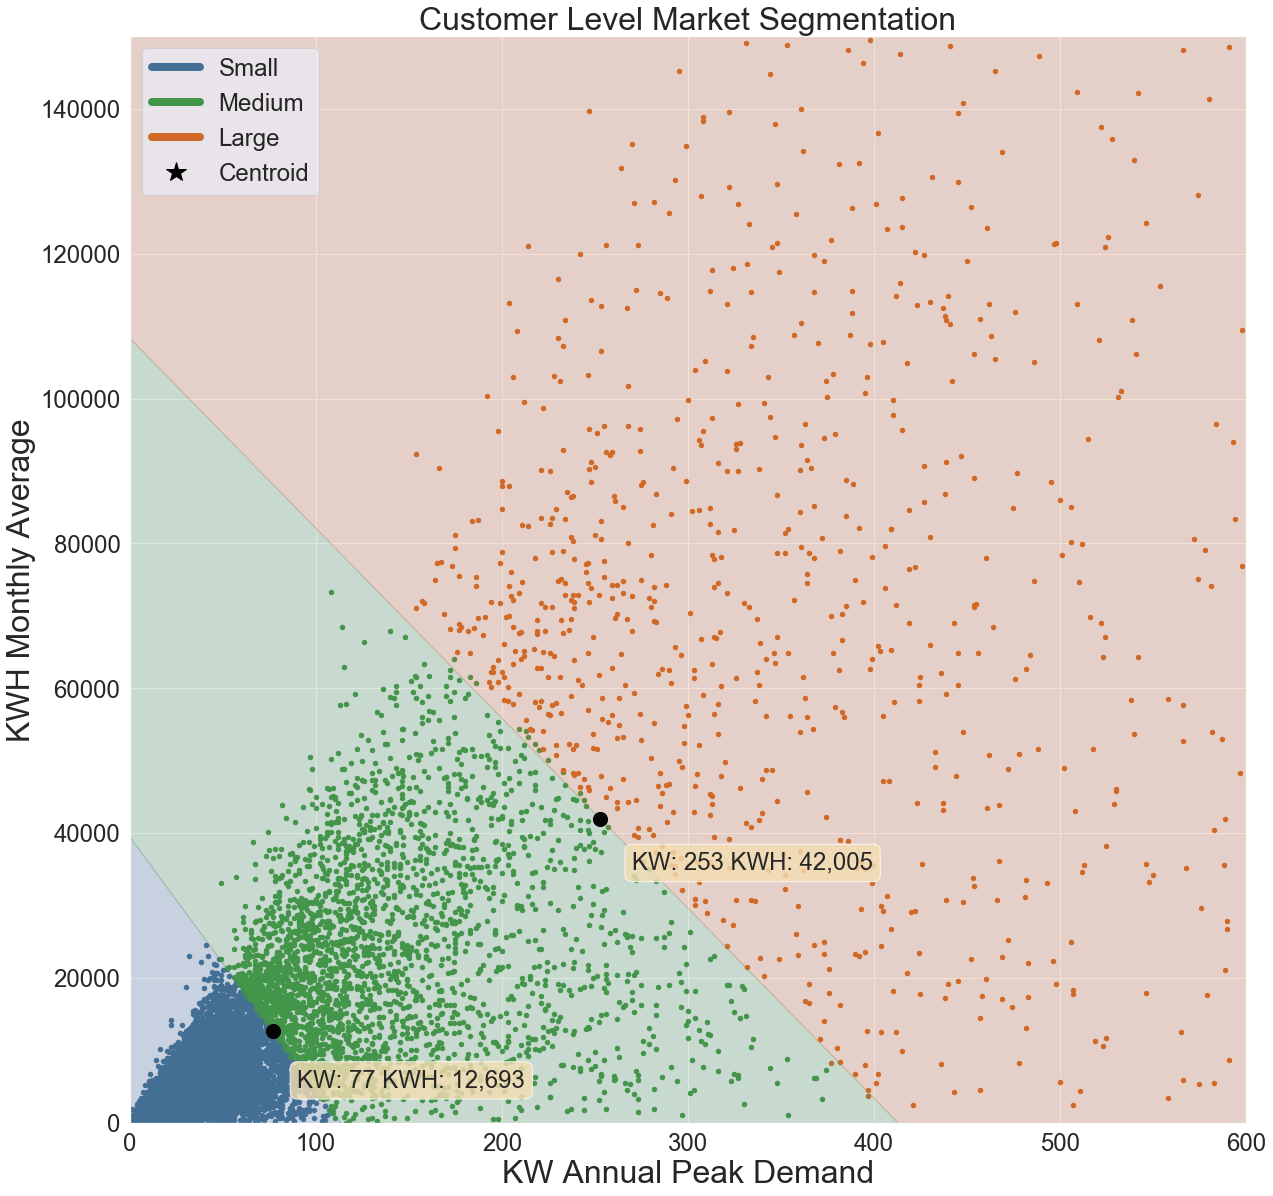

In [253]:
# The purpose of this plot is for the steering committee, so verbage is simplified

#from matplotlib.lines import Line2D
#sns.set()
fig=plt.figure(figsize=(20,20))
axes=plt.gca()

plt.scatter(seg1['KWreal'],seg1['KWHreal'],s=20,color='#436F95')
plt.scatter(seg2['KWreal'],seg2['KWHreal'],s=20,color='#43954A')
plt.scatter(seg3['KWreal'],seg3['KWHreal'],s=20,color='#D16926')
#plt.scatter(part_model['KWreal'],part_model['KWHreal'],s=20,color='k')

#x_values=np.array(axes.get_xlim())
#plt.plot(x_values,slp1*x_values+int1,'--',color='k',linewidth=4)
#plt.plot(x_values,83*x_values+5850,'--',color='k',linewidth=4)

plt.fill_between(x_values,slp1*x_values+int1,alpha=0.2,color='#436F95')
plt.fill_between(x_values,slp2*x_values+int2,y2=slp1*x_values+int1,alpha=0.2,color='#43954A')
plt.fill_between(x_values,150000,y2=slp2*x_values+int2,alpha=0.2,color='#D16926')

#plt.scatter(centroids[:,0]*active_model['KW'].max(), centroids[:,1]*active_model['KWHmo'].max(), marker='*', c='#050505', s=600)
plt.scatter(seg_cutx,seg_cuty,s=200,color='#050505')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
axes.text(0.15, 0.05, 'KW: 77 KWH: 12,693', transform=axes.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)
axes.text(0.45, 0.25, 'KW: 253 KWH: 42,005', transform=axes.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Monthly Average')
plt.title('Customer Level Market Segmentation')
custom_lines = [Line2D([0], [0], color='#436F95', lw=8),
                Line2D([0], [0], color='#43954A', lw=8),
                Line2D([0], [0], color='#D16926', lw=8),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None',markersize=20),
                Line2D([0], [0], color='#EB2612', lw=8)]
plt.legend(custom_lines,['Small','Medium','Large','Centroid'])
plt.xlim(0,600)
plt.ylim(0,150000)
plt.show()

Using the most common energy usage we could make an easier cutoff to talk about and decsribe. Something along the lines of:

"Energy usage below 77 KW demand and 12,693 KWH monthly is small, below 253 KW demand and 42,000 KWH monthly is medium, and above that is large."

#### Participation Based

In [238]:
path=r'Datasets/Participation Segment - Copy.csv'
df_participation=pd.read_csv(path,encoding='latin-1')

In [239]:
df_participation.dtypes

X.CUSTOMER_ID                 float64
Utility.Meter.Number.x         object
project_ID                     object
project_name                   object
Partner.Number                 object
Batch.Creation.Date            object
Install.City                   object
Install.State                  object
Install.Zip                   float64
Business.Type                  object
Schedule.Rate                   int64
Contractor.Name                object
Construction.Type              object
Materical.Cost                float64
Labor.Cost                    float64
Other.Cost                    float64
Calculation.Method             object
Version.Number                 object
Project.Incentives            float64
Project.kWh                     int64
Project.Cost                  float64
Project.Incentives.1          float64
Project.SPB                   float64
Project.SPB.w.o.incentives    float64
Project.kW.Reduction          float64
Project.Cost.Savings          float64
IO.Date     

In [244]:
df_participation.KWHreal.isnull().sum()

237

In [245]:
df_participation=df_participation.dropna(subset=['KWreal','KWHreal'])

In [240]:
df_participation.Segment.unique()

array(['Medium', 'Large', 'Small', nan], dtype=object)

In [248]:
part_model=df_participation.loc[df_participation['KWHreal']<150000]
part_model=part_model.loc[part_model['KWHreal']>0]

part_model=part_model.loc[part_model['KWreal']<600]
part_model=part_model.loc[part_model['KWreal']>0]

C:\Users\apetersen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


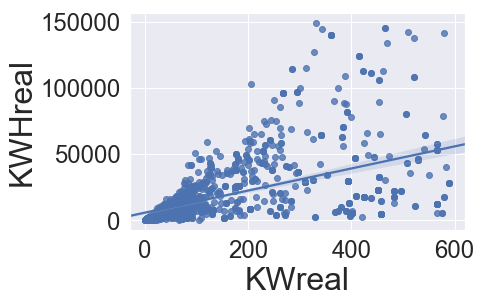

In [249]:
sns.regplot(part_model['KWreal'],part_model['KWHreal'])

In [250]:
lin_reg('KWreal','KWHreal',part_model)

                            OLS Regression Results                            
Dep. Variable:                KWHreal   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     516.4
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           1.14e-96
Time:                        15:06:30   Log-Likelihood:                -14955.
No. Observations:                1314   AIC:                         2.991e+04
Df Residuals:                    1312   BIC:                         2.993e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5850.1307    811.564      7.208      0.0

\begin{equation}
\hat{KWH}=166.5829(KW)-127.9247
\end{equation}

In [208]:
# find where this model user lies on the segmentation
def y1(x):
    return slp1*x+int1
def y2(x):
    return slp2*x+int2
def y3(x):
    return 166.5829*x-127.9247

In [209]:
# determine KW peak values at the segment shift
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')

seg1_cut=solve(y1(x)-y3(x), x)
seg2_cut=solve(y2(x)-y3(x), x)

print(seg1_cut,seg2_cut)

[76.9661927251563] [252.925544124059]


In [214]:
seg_cutx=[seg1_cut,seg2_cut]
seg_cuty=[seg1_cuty,seg2_cuty]

In [210]:
def x1(y):
    return (int1-y)/(-slp1)
def x2(y):
    return (int2-y)/(-slp2)
def x3(y):
    return (127.9247+y)/(166.5829)

In [211]:
y = Symbol('y')

seg1_cuty=solve(x1(y)-x3(y), y)
seg2_cuty=solve(x2(y)-x3(y), y)

print(seg1_cuty,seg2_cuty)

[12693.3268861154] [42005.1459242636]


In [212]:
SMALL_SIZE = 24
MEDIUM_SIZE = 32
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

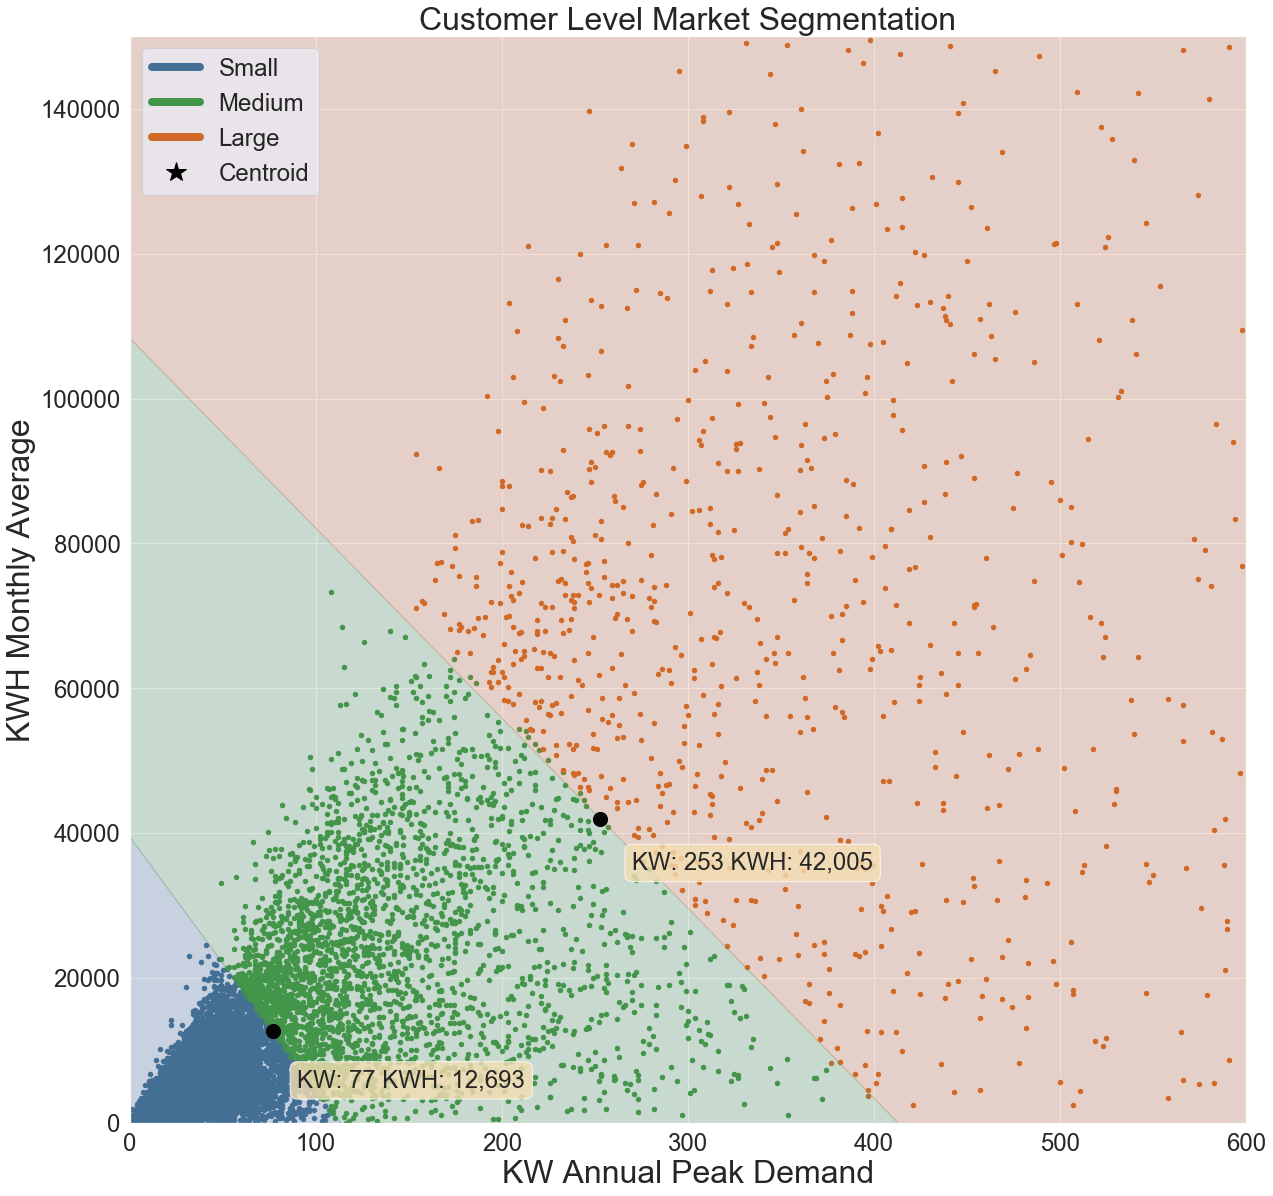

In [237]:
# The purpose of this plot is for the steering committee, so verbage is simplified

#from matplotlib.lines import Line2D
#sns.set()
fig=plt.figure(figsize=(20,20))
axes=plt.gca()

plt.scatter(seg1['KWreal'],seg1['KWHreal'],s=20,color='#436F95')
plt.scatter(seg2['KWreal'],seg2['KWHreal'],s=20,color='#43954A')
plt.scatter(seg3['KWreal'],seg3['KWHreal'],s=20,color='#D16926')

x_values=np.array(axes.get_xlim())
#plt.plot(x_values,slp1*x_values+int1,'--',color='k',linewidth=4)
#plt.plot(x_values,slp2*x_values+int2,'--',color='k',linewidth=4)

plt.fill_between(x_values,slp1*x_values+int1,alpha=0.2,color='#436F95')
plt.fill_between(x_values,slp2*x_values+int2,y2=slp1*x_values+int1,alpha=0.2,color='#43954A')
plt.fill_between(x_values,150000,y2=slp2*x_values+int2,alpha=0.2,color='#D16926')

#plt.scatter(centroids[:,0]*active_model['KW'].max(), centroids[:,1]*active_model['KWHmo'].max(), marker='*', c='#050505', s=600)
plt.scatter(seg_cutx,seg_cuty,s=200,color='#050505')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
axes.text(0.15, 0.05, 'KW: 77 KWH: 12,693', transform=axes.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)
axes.text(0.45, 0.25, 'KW: 253 KWH: 42,005', transform=axes.transAxes, fontsize=24,
        verticalalignment='top', bbox=props)

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Monthly Average')
plt.title('Customer Level Market Segmentation')
custom_lines = [Line2D([0], [0], color='#436F95', lw=8),
                Line2D([0], [0], color='#43954A', lw=8),
                Line2D([0], [0], color='#D16926', lw=8),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None',markersize=20),
                Line2D([0], [0], color='#EB2612', lw=8)]
plt.legend(custom_lines,['Small','Medium','Large','Centroid'])
plt.xlim(0,600)
plt.ylim(0,150000)
plt.show()

### Common Customers

In [93]:
# create a list of common customers split into segments as a sanity check.
# in this instance of the model: 0 small, 2 medium, 1 large

dcat_names(df_norm,'NAME','','NAME','HOME DEPOT')


['HOME DEPOT' 'HOME DEPOT DRIVE IN INC' 'HOME DEPOT LINDON'
 'HOME DEPOT USA INC' 'THE HOME DEPOT USA INC']


In [106]:
df_norm['Group']=0
df_norm.loc[df_norm.Segment==1,'Group']="Large"
df_norm.loc[df_norm.Segment==0,'Group']="Small"
df_norm.loc[df_norm.Segment==2,'Group']="Medium"

In [102]:
df_norm['Small']=df_norm.loc[df_norm['Segment']==0]['NAME']
df_norm['Medium']=df_norm.loc[df_norm['Segment']==2]['NAME']
df_norm['Large']=df_norm.loc[df_norm['Segment']==1]['NAME']

In [114]:
df_norm=df_norm.drop(axis=1,columns=['Small','Medium','Large'])

In [115]:
df_norm.head()

,KW,KWHmo,AM,NAME,ID,Segment,KWreal,KWHreal,Group
0,0.038462,0.041438,0.0,ANGEL CAFE,64098894,0,23.0,6195.0,Small
1,0.018395,0.025552,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,3820.0,Small
2,0.018395,0.002502,0.0,FINLAYSON ENGINEERING INC,10006535,0,11.0,374.0,Small
3,0.043478,0.042729,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,0,26.0,6388.0,Small
4,0.167224,0.157926,0.0,HAMBLIN #527 INC,26572806,2,100.0,23610.0,Medium


In [117]:
# export to csv for others to easily look at in Excel\
df_norm.to_csv('Exports/Market_Segment_Groups.csv')

## Participation Model

The purpose of this section is to create a two-dimensional model (KWH annual and KW peak annual) for _participation_ data rather than _customer_ data. The participation data is located in the dataframe "part"

In [146]:
part.KW.count()

14

In [147]:
part.describe()

,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Site Postal Code,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled,Managed,incentiverate
count,1.400000e+01,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,3.404747e+07,0.785714,8.857143,2.748298e+06,338.785714,98.214286,12.357143,54638.785714,84103.642857,3157.827857,11517.397143,0.714286,25.774498
std,2.432946e+07,0.425815,16.755514,4.043214e+06,342.228933,189.445011,8.261190,76118.061867,13.171106,6119.610342,20101.813159,0.468807,15.579561
min,9.136926e+06,0.000000,1.000000,0.000000e+00,0.000000,11.000000,6.000000,0.000000,84065.000000,511.250000,2333.100000,0.000000,7.152878
25%,1.166923e+07,1.000000,1.000000,1.687800e+05,84.500000,12.000000,6.000000,12761.000000,84101.000000,530.300000,2333.100000,0.250000,18.421141
50%,3.208610e+07,1.000000,2.500000,1.110134e+06,263.500000,24.000000,7.000000,23411.500000,84101.000000,622.550000,3342.385000,1.000000,22.729416
75%,4.175203e+07,1.000000,5.000000,3.049185e+06,451.750000,58.500000,23.000000,69918.750000,84114.000000,1900.610000,10175.732500,1.000000,27.135117
max,8.856426e+07,1.000000,60.000000,1.409233e+07,1108.000000,675.000000,23.000000,275125.000000,84119.000000,22301.600000,77967.580000,1.000000,63.446692


In [153]:
part_model=part.loc[part['KWHmo']<300000]
part_model=part_model.loc[part_model['KWHmo']>0]

part_model=part_model.loc[part_model['KW']<800]
part_model=part_model.loc[part_model['KW']>0]

In [154]:
part_model.KW.count()

12

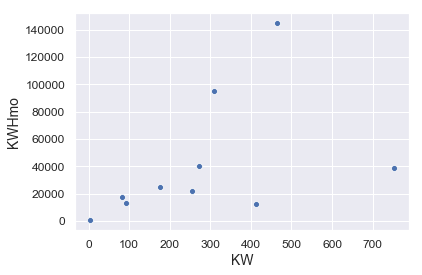

In [151]:
# notice this is scaled up by a factor of 10 compared to customer data
sns.scatterplot(part_model['KW'],part_model['KWHmo'])

In [187]:
#kwscalepart=minmax.fit_transform(part_model[['KW']].values)
#kwhscalepart=minmax.fit_transform(part_model[['KWH']].values)

kwscalepart=part_model[['KW']]/part_model['KW'].max()
kwhscalepart=part_model[['KWH']]/part_model['KWH'].max()

df_part=pd.DataFrame(kwscalepart)
df_part.rename(columns={0:'KW'},inplace=True)

In [188]:
df_part.head()

,KW
0,0.251889
1,0.821159
3,0.093199
18,0.289673
22,0.503778


In [189]:
#kwhscale2d=minmax.fit_transform(custut_model[['KWH']].values)
df_part['KWH']=kwhscalepart
df_part.rename(columns={0:'KW'},inplace=True)
df_part.head()

,KW,KWH
0,0.251889,0.294016
1,0.821159,0.768469
3,0.093199,0.099998
18,0.289673,0.607840
22,0.503778,0.656109


In [190]:
# Assuming KW and KWH are still in place, add in actively managed information:

df_part['AM']=part_model['Managed']

In [191]:
df_part.isnull().sum()

KW     0
KWH    0
AM     0
dtype: int64

In [192]:
df_part.KW.count()

302

In [193]:
df_part.head()

,KW,KWH,AM
0,0.251889,0.294016,0
1,0.821159,0.768469,0
3,0.093199,0.099998,0
18,0.289673,0.607840,0
22,0.503778,0.656109,0


In [194]:
part['KW'].max()

1108

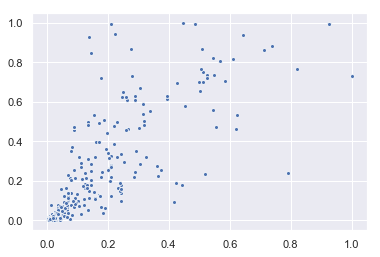

In [195]:
Xpart=np.array(list(zip(df_part['KW'].values,df_part['KWH'].values)))
sns.scatterplot(df_part['KW'].values,df_part['KWH'].values,s=15)

In [196]:
Xpart[:5]

array([[0.25188917, 0.29401631],
       [0.82115869, 0.7684689 ],
       [0.09319899, 0.09999792],
       [0.28967254, 0.60784023],
       [0.50377834, 0.65610925]])

In [197]:
kmeans_part=KMeans(n_clusters=3).fit(Xpart)

labels_part=kmeans_part.predict(Xpart)

centroids_part=kmeans_part.cluster_centers_

In [198]:
print(centroids_part)

[[0.18977496 0.32520075]
 [0.45262859 0.72047503]
 [0.07441719 0.06611933]]


In [199]:
df_part['Segment']=labels_part
df_part.head()

,KW,KWH,AM,Segment
0,0.251889,0.294016,0,0
1,0.821159,0.768469,0,1
3,0.093199,0.099998,0,2
18,0.289673,0.607840,0,1
22,0.503778,0.656109,0,1


In [200]:
part_model.KW.count()

302

In [201]:
# segment dataframe
seg1_part=df_part.loc[df_part['Segment']==0]
seg2_part=df_part.loc[df_part['Segment']==1]
seg3_part=df_part.loc[df_part['Segment']==2]
#acv=df_norm.loc[df_norm['AM']==1]
#acv1=df_norm.loc[df_norm['AM']==2]

In [202]:
xtick=np.arange(0,1,.2);
x=[]
for i in xtick:
    val=np.round(i*part_model['KW'].max(),0)
    x.append(val)

y=[]
for i in xtick:
    val=np.round(i*part_model['KWH'].max()/1000000,2)
    y.append(val)
print(x,y)
xlabel=list(x)
ylabel=list(y)

[0.0, 79.0, 159.0, 238.0, 318.0] [0.0, 0.19, 0.39, 0.58, 0.77]


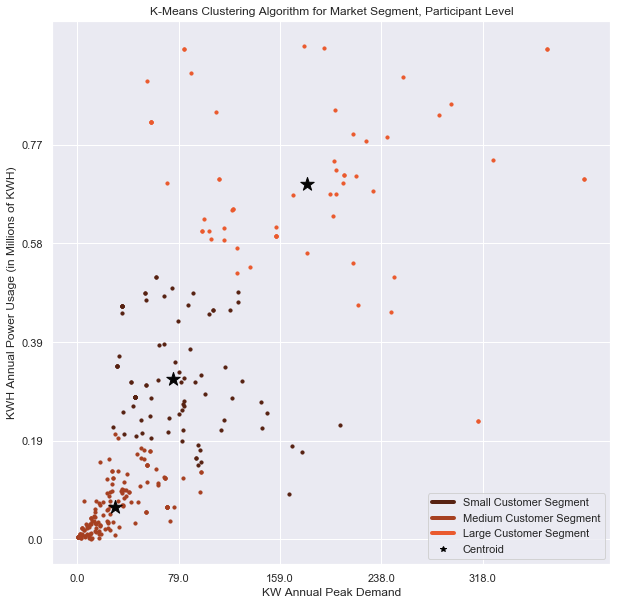

In [203]:
from matplotlib.lines import Line2D
sns.set()
fig=plt.figure(figsize=(10,10))
#7431A3
#286A8B
#AA013
#288B54
plt.scatter(seg1_part['KW'],seg1_part['KWH'],color='#572212',s=10)
plt.scatter(seg3_part['KW'],seg3_part['KWH'],color='#A64021',s=10)
plt.scatter(seg2_part['KW'],seg2_part['KWH'],color='#EA5A2E',s=10)
#plt.scatter(acv['KW'],acv['KWH'],color='#EB2612',s=10)
#plt.scatter(acv1['KW'],acv1['KWH'],color='#0BDD00',s=10)
plt.scatter(centroids_part[:, 0], centroids_part[:, 1], marker='*', c='#050505', s=200)
plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Annual Power Usage (in Millions of KWH)')
plt.xticks(np.arange(0,1,.2),xlabel)
plt.yticks(np.arange(0,1,.2),ylabel)
plt.title('K-Means Clustering Algorithm for Market Segment, Participant Level')

custom_lines = [Line2D([0], [0], color='#572212', lw=4),
                Line2D([0], [0], color='#A64021', lw=4),
                Line2D([0], [0], color='#EA5A2E', lw=4),
                #Line2D([0], [0], color='#EB2612', lw=4),
                #Line2D([0], [0], color='#0BDD00', lw=4),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None')]
plt.legend(custom_lines,['Small Customer Segment','Medium Customer Segment','Large Customer Segment','Centroid'])

plt.show()

In [204]:
np.round(100*part_model['KW'].count()/active_model['KW'].count(),2)

0.9

Thoughts:

1. Segments all pushed higher
2. We have to keep the idea that this model is not as stable due to having less than 1% of the data of the other model. New customers and projects should be placed into an already stable model, such as the customer usage one.

### Segment Characteristics

__To do:__ 

* Go to measure level and calculate time series of KW and KWH ( to see portfolio over the year per month)
* Add in new quarter data so I have full year (Oct 17 - Oct 18)

Who are these groups? Should look at:

* Average KW Peak Demand
* Time of year for peak demand (aggregate monthly)
* Average KWH Usage 
* KWH Usage over time (annual)

In [414]:
active_model.head(5)

,NAME,#CUSTOMER_ID,AM,Number of Meters (per customer),KWH,KW,Number of Measurements,Most Common Rate Schedule,KWHmo,Actively Managed
0,ANGEL CAFE,64098894,0,1,74340,23,12,23,6195.0,0.0
1,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0
2,FINLAYSON ENGINEERING INC,10006535,0,1,4494,11,12,23,374.0,0.0
3,FLOW QUIP MINING INDUSTRIAL,13375654,0,1,76655,26,12,23,6388.0,0.0
4,HAMBLIN #527 INC,26572806,0,1,283320,100,12,6,23610.0,0.0


In [88]:
# combine segments with the rest of customer data (df_norm and active_model)

seg_char=pd.merge(active_model,df_norm,on='NAME',how='inner')
seg_char.head(5)

,NAME,#CUSTOMER_ID,AM_x,Number of Meters (per customer),KWH,KW_x,Number of Measurements,Most Common Rate Schedule,KWHmo_x,Actively Managed,KW_y,KWHmo_y,AM_y,ID,Segment,KWreal,KWHreal
0,ANGEL CAFE,64098894,0,1,74340,23,12,23,6195.0,0.0,0.038462,0.041438,0.0,64098894,1,23.0,6195.0
1,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0,0.018395,0.025552,1.0,35622826,1,11.0,3820.0
2,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0,0.053512,0.038488,1.0,18783976,1,32.0,5754.0
3,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0,0.028428,0.037130,1.0,18790346,1,17.0,5551.0
4,AWS - AT&T WIRELESS,35622826,1,2,91670,11,24,23,3820.0,1.0,0.043478,0.044368,1.0,27208785,1,26.0,6633.0


In [89]:
# Assuming the index has not changed
part_model['Segment']=df_part['Segment']

NameError: name 'df_part' is not defined

In [486]:
part_model.head(5)

,NAME,AM,Number of Meters (per customer),KWH,KW,Most Common Rate Schedule,Program_Name,Project_Name,Project_Status,Utility Meter Number,Utility Rate ID,ProjectManager,Site State,Site Postal Code,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled,Managed,incentiverate,bins,Segment
0,HAMBLIN #527 INC,0,1,188480,94,6,2018 wattsmart Business - UT,WSBUT_77784,Completed,2941997,08GNSV0006,Non-Managed,UT,84129,700.00,1571.52,0,44.542863,"(55.4, 110.8]",2
1,106TH SO BUSINESS PARK,0,2,491823,262,6,2018 wattsmart Business - UT,WSBUT_73632,Completed,2175633,08GNSV0006,Non-Managed,UT,84095,1661.29,6700.00,0,24.795373,"(221.6, 277.0]",1
3,671 POPLAR LLC,0,1,65800,33,6,2018 wattsmart Business - UT,WSBUT_75192,Completed,61232483,08GNSV0006,Non-Managed,UT,84095,458.15,6569.00,0,6.974425,"(-1.109, 55.4]",0
18,AEROSPACE ENGINEERING AND SUPPORT,0,7,423668,114,23,2018 wattsmart Business - UT,WSBUT_74204,Completed,1235726,08GNSV0006,Non-Managed,UT,84401,3596.00,20973.00,0,17.145854,"(110.8, 166.2]",2
22,ALD OFFICES LLC,0,1,400480,179,6,2018 wattsmart Business - UT,WSBUT_73750,Completed,35798398,08GNSV0006,Non-Managed,UT,84123,682.30,3251.67,0,20.983064,"(166.2, 221.6]",1


In [515]:
"""
determine average KWH over a year. Careful, recall that this is aggregated data, where KWH is sum total of monthly 
measurements over 3 quarters. KW is peak demand that customer sees over 3 quarters. The new quarter is out, so I can 
add that to the dataset, or divide by (Oct17 - Jul 18) 9 months.

To get time series I will want to go back to meter level and calculate the usage per month.
"""

'\ndetermine average KWH over a year. Careful, recall that this is aggregated data, where KWH is sum total of monthly \nmeasurements over 3 quarters. KW is peak demand that customer sees over 3 quarters. The new quarter is out, so I can \nadd that to the dataset, or divide by (Oct17 - Jul 18) 9 months.\n\nTo get time series I will want to go back to meter level and calculate the usage per month.\n'

In [ ]:
group1=part_model.loc[part_model['Segment']==0]
group2=part_model.loc[part_model['Segment']==0]
group3=part_model.loc[part_model['Segment']==0]

In [513]:
part_model.head(2)

,NAME,AM,Number of Meters (per customer),KWH,KW,Most Common Rate Schedule,Program_Name,Project_Name,Project_Status,Utility Meter Number,Utility Rate ID,ProjectManager,Site State,Site Postal Code,TotalCustomerIncPostInstalled,TotalIncreMeasCostPostInstalled,Managed,incentiverate,bins,Segment
0,HAMBLIN #527 INC,0,1,188480,94,6,2018 wattsmart Business - UT,WSBUT_77784,Completed,2941997,08GNSV0006,Non-Managed,UT,84129,700.00,1571.52,0,44.542863,"(55.4, 110.8]",2
1,106TH SO BUSINESS PARK,0,2,491823,262,6,2018 wattsmart Business - UT,WSBUT_73632,Completed,2175633,08GNSV0006,Non-Managed,UT,84095,1661.29,6700.00,0,24.795373,"(221.6, 277.0]",1


In [499]:
part_group=part_model.groupby(['Segment']).agg({'KW':'mean','KWH':'mean','incentiverate':'mean'})
part_group.sort_values(by='KW',inplace=True)
part_group['Segment']

,KW,KWH
Segment,,
0,33.969072,76683.664948
2,93.576923,344017.884615
1,194.358491,645372.962264


In [502]:
part_group=flatten_aggregated_dataframe(part_group)
part_group

,Segment,KW,KWH
0,0,33.969072,76683.664948
1,2,93.576923,344017.884615
2,1,194.358491,645372.962264


In [511]:
segments=[]
i=1
for el in part_group['Segment']:
    segments.append(i)
    i+=1
part_group['Segment']=segments

In [512]:
part_group

,Segment,KW,KWH
0,1,33.969072,76683.664948
1,2,93.576923,344017.884615
2,3,194.358491,645372.962264


#### Power Usage

In [221]:
# reorder segments, switch 2 and 3
df_norm.loc[df_norm['Segment']==1,'Segment']=3
df_norm.loc[df_norm['Segment']==0,'Segment']=1


In [222]:
df_norm.head()

,KW,KWH,AM,NAME,ID,Segment,KWreal,KWHreal
0,0.057644,0.074343,0.0,ANGEL CAFE,64098894,1,23.0,74340.0
1,0.027569,0.091673,1.0,AWS - AT&T WIRELESS,35622826,1,11.0,91670.0
2,0.027569,0.004494,0.0,FINLAYSON ENGINEERING INC,10006535,1,11.0,4494.0
3,0.065163,0.076658,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,1,26.0,76655.0
4,0.250627,0.283330,0.0,HAMBLIN #527 INC,26572806,2,100.0,283320.0


Text(0.5, 1.0, 'graph')

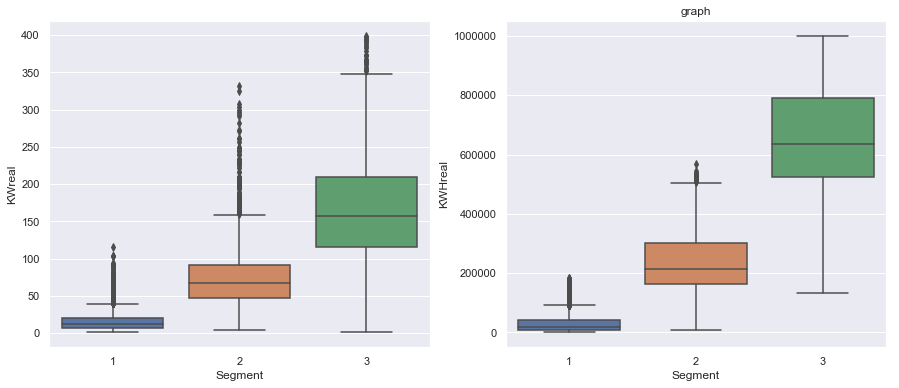

In [243]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x=df_norm['Segment'],y=df_norm['KWreal'])
plt.xticks=(np.arange(3),('Small','Medium','Large'))

plt.subplot(1,2,2)
sns.boxplot(x=df_norm['Segment'],y=df_norm['KWHreal'])
plt.title('graph')

In [451]:
seg_char.columns

Index(['NAME', '#CUSTOMER_ID', 'AM_x', 'Number of Meters (per customer)',
       'KWH', 'KW_x', 'Number of Measurements', 'Most Common Rate Schedule',
       'KWHmo_x', 'Actively Managed', 'KW_y', 'KWHmo_y', 'AM_y', 'ID',
       'Segment', 'KWreal', 'KWHreal'],
      dtype='object')

#### Rate Schedule

In [90]:
for item in seg_char['Most Common Rate Schedule'].unique():
    print(item)

23
6
15
10
35
9
8


In [91]:
# define color wheel
color_pal={1:'#E64412',2:'#E6AC12',3:'#72E612',4:'#7C8C0C',5:'#6912E6',6:'#E612D6',7:'#124CE6'}
col

{1: '#E64412',
 2: '#E6AC12',
 3: '#72E612',
 4: '#7C8C0C',
 5: '#6912E6',
 6: '#E612D6',
 7: '#124CE6'}

In [94]:
for item in seg_char['Most Common Rate Schedule'].unique():
    print(item)
    print(active.loc[active['Most Common Rate Schedule']==item]['KW'].count())

23
39136
6
5996
15
92
10
1671
35
452
9
79
8
64


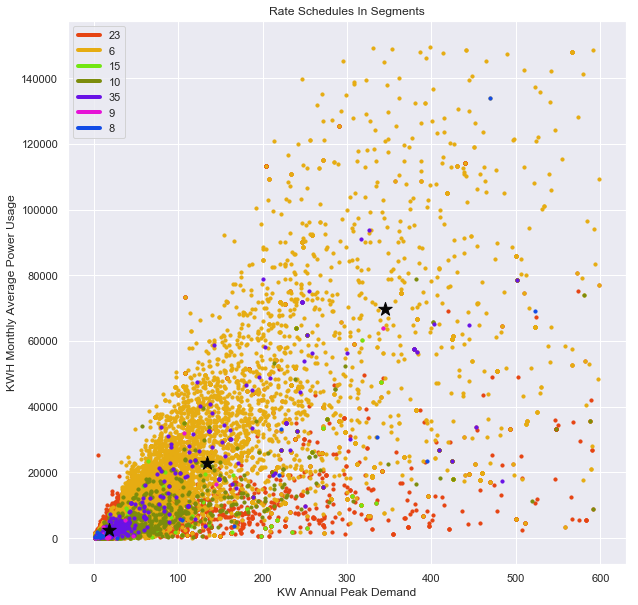

In [103]:
# plot rate schedules over top of segmentation

fig=plt.figure(figsize=(10,10))

#plt.scatter(seg1['KWreal'],seg1['KWHreal'],color='#144A65',s=10)
#plt.scatter(seg2['KWreal'],seg2['KWHreal'],color='#2583B3',s=10)
#plt.scatter(seg3['KWreal'],seg3['KWHreal'],color='#33B6F9',s=10)

#rate schedule data
color_cnt=1
custom_lines=[]
leg_labels=[]
for item in seg_char['Most Common Rate Schedule'].unique():
    #if item!=6:
    plt.scatter(seg_char.loc[seg_char['Most Common Rate Schedule']==item]['KWreal'],seg_char.loc[seg_char['Most Common Rate Schedule']==item]['KWHreal'],color=col[color_cnt],s=10)
    custom_lines.append(Line2D([0], [0], color=col[color_cnt], lw=4))
    leg_labels.append(item)
    color_cnt+=1

plt.scatter(centroids[:,0]*active_model['KW'].max(), centroids[:,1]*active_model['KWHmo'].max(), marker='*', c='#050505', s=200)

plt.xlabel('KW Annual Peak Demand')
plt.ylabel('KWH Monthly Average Power Usage')
#plt.xticks(np.arange(0,1,.2),xlabel)
#plt.yticks(np.arange(0,300000,300000/5),df_norm['KWHreal'])
plt.title('Rate Schedules In Segments')

'''custom_lines = [Line2D([0], [0], color='#144A65', lw=4),
                Line2D([0], [0], color='#2583B3', lw=4),
                Line2D([0], [0], color='#33B6F9', lw=4),
                #Line2D([0], [0], color='#EB2612', lw=4),
                #Line2D([0], [0], color='#0BDD00', lw=4),
                Line2D([0], [0], color='#000000',marker='*',linestyle='None')]'''
plt.legend(custom_lines,leg_labels)
plt.show()

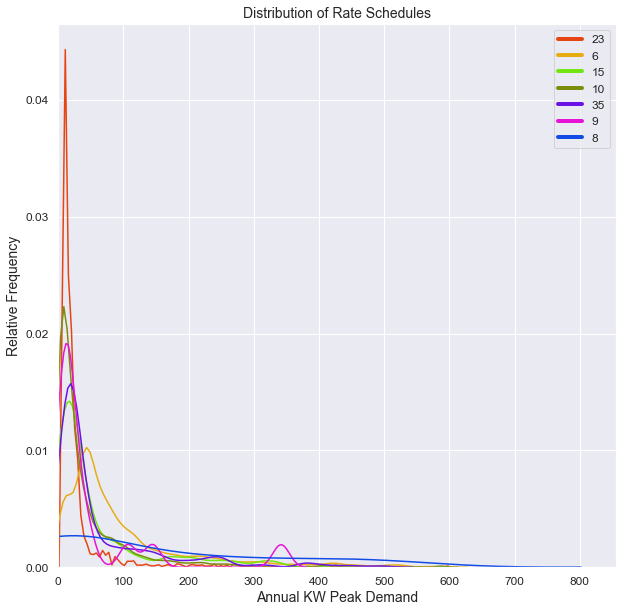

In [112]:
# visualize distribution of rate schedules
leg_labels=[]
custom_lines=[]
color_cnt=1
plt.figure(figsize=(10,10))

for item in seg_char['Most Common Rate Schedule'].unique():
    sns.kdeplot(seg_char.loc[seg_char['Most Common Rate Schedule']==item]['KWreal'],color=col[color_cnt])
    leg_labels.append(item)
    custom_lines.append(Line2D([0], [0], color=col[color_cnt], lw=4))
    color_cnt+=1
plt.legend(custom_lines,leg_labels)
plt.xlim(0,)
plt.title('Distribution of Rate Schedules')
plt.xlabel('Annual KW Peak Demand')
plt.ylabel('Relative Frequency')
plt.show()

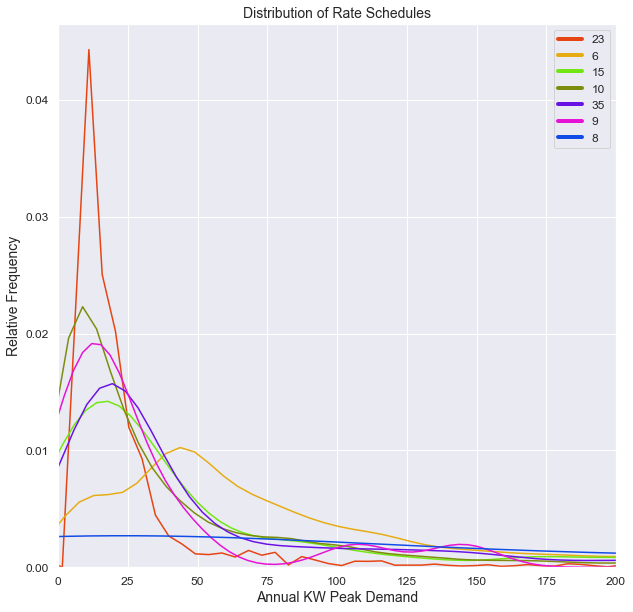

In [113]:
# visualize distribution of rate schedules
plt.figure(figsize=(10,10))
leg_labels=[]
custom_lines=[]
color_cnt=1
for item in seg_char['Most Common Rate Schedule'].unique():
    sns.kdeplot(seg_char.loc[seg_char['Most Common Rate Schedule']==item]['KWreal'],color=col[color_cnt])
    leg_labels.append(item)
    custom_lines.append(Line2D([0], [0], color=col[color_cnt], lw=4))
    color_cnt+=1
plt.legend(custom_lines,leg_labels)
plt.xlim(0,200)
plt.title('Distribution of Rate Schedules')
plt.xlabel('Annual KW Peak Demand')
plt.ylabel('Relative Frequency')
plt.show()

Thoughts:

1. 6 is all over the place
2. 23 has a very wide range of energy usage most likely due to inappropriate assignments
3. Many are well defined within segments (10,35,8,9)

## Three Dimensions

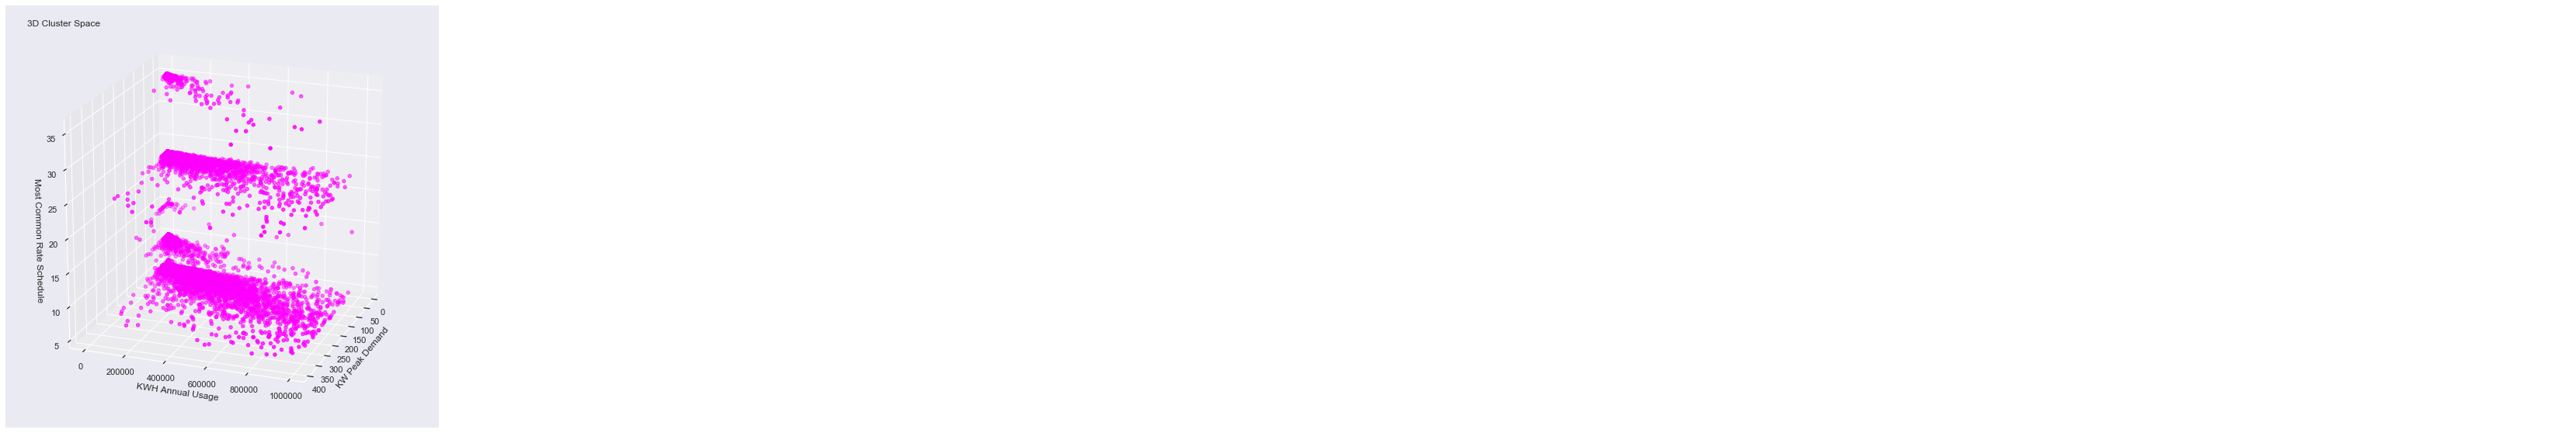

In [261]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=[10,10])

#ax=Axes3D(fig)
ax=fig.gca(projection='3d')
ax.view_init(20,20)
ax.scatter(active_model['KW'],active_model['KWH'],active_model['Most Common Rate Schedule'],color='magenta')
ax.set_xlabel('KW Peak Demand')
ax.set_ylabel('KWH Annual Usage')
ax.set_zlabel('Most Common Rate Schedule')
ax.text2D(0.05, 0.95, "3D Cluster Space", transform=ax.transAxes)
plt.draw()
plt.show()

Thoughts:

1. Using a discrete variable introduces slight challenges, default k-means would simply group by rate schedule. There are distance measures for mixed data that would need to be used.

# Recommendation

Two dimensional model based on KWH Annual Usage and KW Demand Usage

# Exports

In [379]:
# Export for Van with Customer Data segments

df_norm.head(5)

,KW,KWH,AM,NAME,ID,Segment,KWreal,KWHreal
0,0.057644,0.074343,0.0,ANGEL CAFE,64098894,0,23.0,74340.0
1,0.027569,0.091673,1.0,AWS - AT&T WIRELESS,35622826,0,11.0,91670.0
2,0.027569,0.004494,0.0,FINLAYSON ENGINEERING INC,10006535,0,11.0,4494.0
3,0.065163,0.076658,0.0,FLOW QUIP MINING INDUSTRIAL,13375654,0,26.0,76655.0
4,0.250627,0.283330,0.0,HAMBLIN #527 INC,26572806,2,100.0,283320.0


In [252]:
savepath=r'C:\Users\apetersen\Nexant Market Segmentation\Exports\Market Segment Data.csv'
df_norm.to_csv(savepath,encoding='utf-8')